
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.841799                4.023610          2166.528401   
2     0.745741                4.120849          2167.752735   
3     0.857043                4.046770          2167.738571   
4     0.562293                4.096955          2166.987333   
5     0.605775                4.196860          2166.480413   
...        ...                     ...                  ...   
1240  0.699000                4.142208          2166.999631   
1241  0.993107                4.234881          2169.292828   
1242  0.685041                4.208365          2166.456111   
1243  0.758577                4.103546          2168.455835   
1244  0.770469                4.234312          2166.627673   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9542.459364   185.840644                    0.0           0.0   
2               9428.762120   185.745662                    0.0           0.0   
3               9378.129468   185.892371                    0.0           0.0   
4               9378.083263   185.699919                    0.0           0.0   
5               9408.826957   185.760788                    0.0           0.0   
...                     ...          ...                    ...           ...   
1240            8604.508731   180.473741                    0.0           0.0   
1241            9068.198878   185.599466                    0.0           0.0   
1242            9009.520162   185.623744                    0.0           0.0   
1243            9067.531212   185.804355                    0.0           0.0   
1244            9163.986060   185.989720                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.356        0.21  44563.0    15.0  158.500000   
2              0.373        0.23  44563.0    16.0  171.328859   
3              0.362        0.34  44563.0    17.0  140.305882   
4              0.327        0.36  44563.0    18.0  136.408602   
5              0.316        0.29  44563.0    19.0  148.414286   
...              ...         ...      ...     ...         ...   
1240           0.346        0.21  44560.0  4331.0  143.145038   
1241           0.367        0.18  44560.0  4332.0  174.509091   
1242           0.377        0.21  44560.0  4333.0  150.779310   
1243           0.370        0.32  44560.0  4334.0  180.977444   
1244           0.378        0.28  44560.0  4335.0  137.255474   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.149144             18.419079             4.190114   
2               21.021727             18.311770             4.213131   
3               20.963881             18.364760             4.155879   
4               21.241883             18.218154             4.134362   
5               21.214287             18.424676             4.130404   
...                   ...                   ...                  ...   
1240            20.400904             18.543402             3.999111   
1241            20.472408             18.433251             4.032653   
1242            20.949022             18.257860             4.037434   
1243            21.268980             18.243537             4.046777   
1244            21.038464             17.940918             4.067642   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               55.268953    148.406699    191.980078    146.089290   
2               55.442680    152.934846    186.947265    147.487989   
3               55.524416    155.156403    169.603497    147.732849   
4               55.304937    155.535053    163.884489    147.853336   
5               55.324813    161.218320    157.465413    150.978301   
...                   ...           ...           ...           ...   
1240            55.737930    160.269405    176.758759    153.697897   
1241            55.578306    157.573596    168.907413    151.0250

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 1 to 1244
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1244 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1244 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1244 non-null   float64
 3   NAT_GAS _INJECTION_f3    1244 non-null   float64
 4   WINDRATE_f3              1244 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1244 non-null   float64
 6   COAL_FLOW_f3             1244 non-null   float64
 7   Cast_Avg_Mn_f2           1244 non-null   float64
 8   Slag_Fe_f2               1244 non-null   float64
 9   date_f1                  1244 non-null   float64
 10  CNUM                     1244 non-null   float64
 11  LNUM_f1                  1244 non-null   float64
 12  Selec_Top_Gas_CO_f3      1244 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1244 non-null   float64
 14  Selec_Top_Gas_H2_f3     

In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.841799  2022-01-02 03:19:00                4.023610   
2     0.745741  2022-01-02 05:29:00                4.120849   
3     0.857043  2022-01-02 07:36:00                4.046770   
4     0.562293  2022-01-02 09:09:00                4.096955   
5     0.605775  2022-01-02 11:39:00                4.196860   
...        ...                  ...                     ...   
1240  0.699000  2021-12-30 14:20:00                4.142208   
1241  0.993107  2021-12-30 16:29:00                4.234881   
1242  0.685041  2021-12-30 18:31:00                4.208365   
1243  0.758577  2021-12-30 20:42:00                4.103546   
1244  0.770469  2021-12-30 22:11:00                4.234312   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2166.528401            9542.459364   185.840644   
2             2167.752735            9428.762120   185.745662   
3             2167.738571            9378.129468   185.892371   
4             2166.987333            9378.083263   185.699919   
5             2166.480413            9408.826957   185.760788   
...                   ...                    ...          ...   
1240          2166.999631            8604.508731   180.473741   
1241          2169.292828            9068.198878   185.599466   
1242          2166.456111            9009.520162   185.623744   
1243          2168.455835            9067.531212   185.804355   
1244          2166.627673            9163.986060   185.989720   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.356        0.21   
2                       0.0           0.0           0.373        0.23   
3                       0.0           0.0           0.362        0.34   
4                       0.0           0.0           0.327        0.36   
5                       0.0           0.0           0.316        0.29   
...                     ...           ...             ...         ...   
1240                    0.0           0.0           0.346        0.21   
1241                    0.0           0.0           0.367        0.18   
1242                    0.0           0.0           0.377        0.21   
1243                    0.0           0.0           0.370        0.32   
1244                    0.0           0.0           0.378        0.28   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44563.0    15.0  158.500000            21.149144             18.419079   
2     44563.0    16.0  171.328859            21.021727             18.311770   
3     44563.0    17.0  140.305882            20.963881             18.364760   
4     44563.0    18.0  136.408602            21.241883             18.218154   
5     44563.0    19.0  148.414286            21.214287             18.424676   
...       ...     ...         ...                  ...                   ...   
1240  44560.0  4331.0  143.145038            20.400904             18.543402   
1241  44560.0  4332.0  174.509091            20.472408             18.433251   
1242  44560.0  4333.0  150.779310            20.949022             18.257860   
1243  44560.0  4334.0  180.977444            21.268980             18.243537   
1244  44560.0  4335.0  137.255474            21.038464             17.940918   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.190114            55.268953    148.406699    191.980078   
2                4.213131            55.442680    152.934846    186.947265   
3                4.155879            55.524416    155.156403    169.603497   
4                4.134362            55.304937    155.535053    163.884489   
5                4.130404            55.324813    161.218320    157.465413   
...                   ...                  ...           ...           ...   
1240             3.999111            55.737930    160.269405    176.758759   
1241     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.841799  2022-01-02 03:19:00   
1     0.000000    0.000000  0.745741  2022-01-02 05:29:00   
2     0.111302    0.000000  0.857043  2022-01-02 07:36:00   
3    -0.294750    0.000000  0.562293  2022-01-02 09:09:00   
4     0.043482    0.000000  0.605775  2022-01-02 11:39:00   
...        ...         ...       ...                  ...   
1239  0.088557   -0.007137  0.699000  2021-12-30 14:20:00   
1240  0.294107    0.019893  0.993107  2021-12-30 16:29:00   
1241 -0.308066    0.001604  0.685041  2021-12-30 18:31:00   
1242  0.073535   -0.009892  0.758577  2021-12-30 20:42:00   
1243  0.011893   -0.015301  0.770469  2021-12-30 22:11:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.023610          2166.528401            9542.459364   
1                   4.120849          2167.752735            9428.762120   
2                   4.046770          2167.738571            9378.129468   
3                   4.096955          2166.987333            9378.083263   
4                   4.196860          2166.480413            9408.826957   
...                      ...                  ...                    ...   
1239                4.142208          2166.999631            8604.508731   
1240                4.234881          2169.292828            9068.198878   
1241                4.208365          2166.456111            9009.520162   
1242                4.103546          2168.455835            9067.531212   
1243                4.234312          2166.627673            9163.986060   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      185.840644                    0.0    0   19     3    2      1  2022   
1      185.745662                    0.0    0   29     5    2      1  2022   
2      185.892371                    0.0    0   36     7    2      1  2022   
3      185.699919                    0.0    0    9     9    2      1  2022   
4      185.760788                    0.0    0   39    11    2      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1239   180.473741                    0.0    0   20    14   30     12  2021   
1240   185.599466                    0.0    0   29    16   30     12  2021   
1241   185.623744                    0.0    0   31    18   30     12  2021   
1242   185.804355                    0.0    0   42    20   30     12  2021   
1243   185.989720                    0.0    0   11    22   30     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.356        0.21    15.0            21.149144   
1              0.0           0.373        0.23    16.0            21.021727   
2              0.0           0.362        0.34    17.0            20.963881   
3              0.0           0.327        0.36    18.0            21.241883   
4              0.0           0.316        0.29    19.0            21.214287   
...            ...             ...         ...     ...                  ...   
1239           0.0           0.346        0.21  4331.0            20.400904   
1240           0.0           0.367        0.18  4332.0            20.472408   
1241           0.0           0.377        0.21  4333.0            20.949022   
1242           0.0           0.370        0.32  4334.0            21.268980   
1243           0.0           0.378        0.28  4335.0            21.038464   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.419079             4.190114            55.268953   
1                18.311770             4.213131            55.442680   
2                18.364760             4.155879            55.524416   
3                18.218154             4.134362            55.304937   
4                18.424676             4.130404            55.324813   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.841799  2022-01-02 03:19:00   
1     0.000000    0.000000  0.745741  2022-01-02 05:29:00   
2     0.111302    0.000000  0.857043  2022-01-02 07:36:00   
3    -0.294750    0.000000  0.562293  2022-01-02 09:09:00   
4     0.043482    0.000000  0.605775  2022-01-02 11:39:00   
...        ...         ...       ...                  ...   
1239  0.088557   -0.007137  0.699000  2021-12-30 14:20:00   
1240  0.294107    0.019893  0.993107  2021-12-30 16:29:00   
1241 -0.308066    0.001604  0.685041  2021-12-30 18:31:00   
1242  0.073535   -0.009892  0.758577  2021-12-30 20:42:00   
1243  0.011893   -0.015301  0.770469  2021-12-30 22:11:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.023610          2166.528401            9542.459364   
1                   4.120849          2167.752735            9428.762120   
2                   4.046770          2167.738571            9378.129468   
3                   4.096955          2166.987333            9378.083263   
4                   4.196860          2166.480413            9408.826957   
...                      ...                  ...                    ...   
1239                4.142208          2166.999631            8604.508731   
1240                4.234881          2169.292828            9068.198878   
1241                4.208365          2166.456111            9009.520162   
1242                4.103546          2168.455835            9067.531212   
1243                4.234312          2166.627673            9163.986060   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      185.840644                    0.0    0   19     3    2      1  2022   
1      185.745662                    0.0    0   29     5    2      1  2022   
2      185.892371                    0.0    0   36     7    2      1  2022   
3      185.699919                    0.0    0    9     9    2      1  2022   
4      185.760788                    0.0    0   39    11    2      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1239   180.473741                    0.0    0   20    14   30     12  2021   
1240   185.599466                    0.0    0   29    16   30     12  2021   
1241   185.623744                    0.0    0   31    18   30     12  2021   
1242   185.804355                    0.0    0   42    20   30     12  2021   
1243   185.989720                    0.0    0   11    22   30     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.356        0.21    15.0            21.149144   
1              0.0           0.373        0.23    16.0            21.021727   
2              0.0           0.362        0.34    17.0            20.963881   
3              0.0           0.327        0.36    18.0            21.241883   
4              0.0           0.316        0.29    19.0            21.214287   
...            ...             ...         ...     ...                  ...   
1239           0.0           0.346        0.21  4331.0            20.400904   
1240           0.0           0.367        0.18  4332.0            20.472408   
1241           0.0           0.377        0.21  4333.0            20.949022   
1242           0.0           0.370        0.32  4334.0            21.268980   
1243           0.0           0.378        0.28  4335.0            21.038464   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.419079             4.190114            55.268953   
1                18.311770             4.213131            55.442680   
2                18.364760             4.155879            55.524416   
3                18.218154             4.134362            55.304937   
4                18.424676             4.130404            55.324813   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.841799                4.023610   
1     0.000000    0.000000  0.745741                4.120849   
2     0.111302    0.000000  0.857043                4.046770   
3    -0.294750    0.000000  0.562293                4.096955   
4     0.043482    0.000000  0.605775                4.196860   
...        ...         ...       ...                     ...   
1239  0.088557   -0.007137  0.699000                4.142208   
1240  0.294107    0.019893  0.993107                4.234881   
1241 -0.308066    0.001604  0.685041                4.208365   
1242  0.073535   -0.009892  0.758577                4.103546   
1243  0.011893   -0.015301  0.770469                4.234312   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2166.528401            9542.459364   185.840644   
1             2167.752735            9428.762120   185.745662   
2             2167.738571            9378.129468   185.892371   
3             2166.987333            9378.083263   185.699919   
4             2166.480413            9408.826957   185.760788   
...                   ...                    ...          ...   
1239          2166.999631            8604.508731   180.473741   
1240          2169.292828            9068.198878   185.599466   
1241          2166.456111            9009.520162   185.623744   
1242          2168.455835            9067.531212   185.804355   
1243          2166.627673            9163.986060   185.989720   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   19     3    2      1  2022           0.0   
1                       0.0    0   29     5    2      1  2022           0.0   
2                       0.0    0   36     7    2      1  2022           0.0   
3                       0.0    0    9     9    2      1  2022           0.0   
4                       0.0    0   39    11    2      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1239                    0.0    0   20    14   30     12  2021           0.0   
1240                    0.0    0   29    16   30     12  2021           0.0   
1241                    0.0    0   31    18   30     12  2021           0.0   
1242                    0.0    0   42    20   30     12  2021           0.0   
1243                    0.0    0   11    22   30     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.356        0.21    15.0            21.149144   
1              0.373        0.23    16.0            21.021727   
2              0.362        0.34    17.0            20.963881   
3              0.327        0.36    18.0            21.241883   
4              0.316        0.29    19.0            21.214287   
...              ...         ...     ...                  ...   
1239           0.346        0.21  4331.0            20.400904   
1240           0.367        0.18  4332.0            20.472408   
1241           0.377        0.21  4333.0            20.949022   
1242           0.370        0.32  4334.0            21.268980   
1243           0.378        0.28  4335.0            21.038464   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.419079             4.190114            55.268953   
1                18.311770             4.213131            55.442680   
2                18.364760             4.155879            55.524416   
3                18.218154             4.134362            55.304937   
4                18.424676             4.130404            55.324813   
...                    ...                  ...                  ...   
1239             18.543402             3.999111            55.737930   
1240             18.433251             4.032653            55.578306   
1241             18.257860             4.037434            55.413611   
1242  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1244 non-null   float64
 1   mov_avg_SI               1244 non-null   float64
 2   SI_f1                    1244 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1244 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1244 non-null   float64
 5   NAT_GAS _INJECTION_f3    1244 non-null   float64
 6   WINDRATE_f3              1244 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1244 non-null   float64
 8   sec                      1244 non-null   int64  
 9   min                      1244 non-null   int64  
 10  hour                     1244 non-null   int64  
 11  day                      1244 non-null   int64  
 12  month                    1244 non-null   int64  
 13  year                     1244 non-null   int64  
 14  COAL_FLOW_f3            

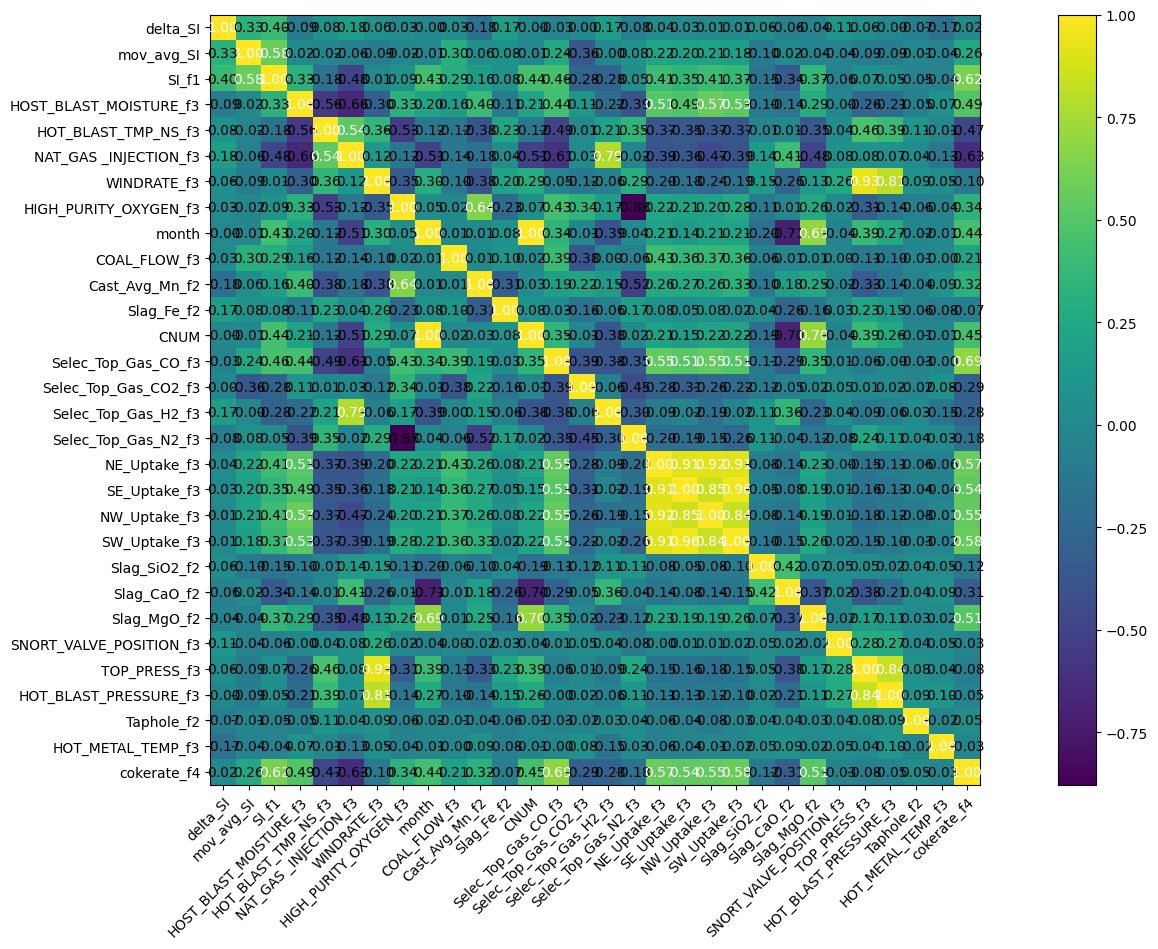

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1244



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.892522
Loss_SI: 1.2340058088302612 Loss_all: 1.0629160404205322
===
[200] Train Loss: 0.058779
Loss_SI: 0.47259196639060974 Loss_all: 0.41886207461357117
===
[400] Train Loss: 0.027920
Loss_SI: 0.36926889419555664 Loss_all: 0.39070940017700195
===
[600] Train Loss: 0.022378
Loss_SI: 0.3853292167186737 Loss_all: 0.4061201214790344
===
[800] Train Loss: 0.023243
Loss_SI: 0.3996005058288574 Loss_all: 0.41690054535865784
===


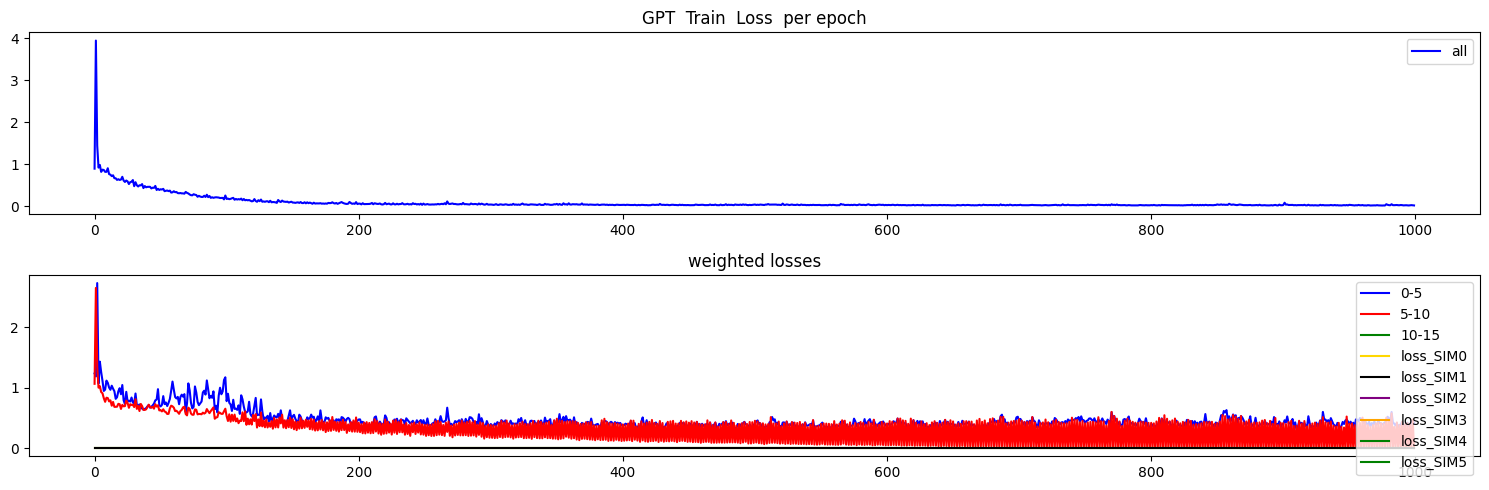

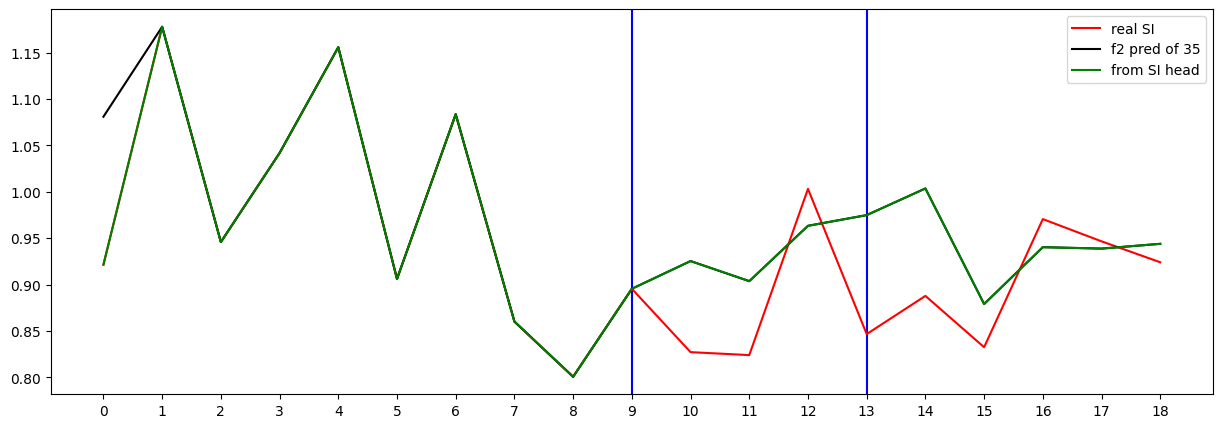

Testing R**2 - (all) - (no inputs):  0.9951855254268875
Testing R**2 - (f2) - SI full (no inputs):  -1.5089479306491116
Testing R**2 - SI head only (no inputs):  -1.5089479306491116
0 ...index R**2 (no inputs):  -1.3776061419904462
1 ...index R**2 (no inputs):  0.11846538163542797
2 ...index R**2 (no inputs):  -1.5089479306491116
3 ...index R**2 (no inputs):  -0.7829472332521108
4 ...index R**2 (no inputs):  -0.2683260643357306
5 ...index R**2 (no inputs):  -3.1166892231249017
6 ...index R**2 (no inputs):  -46.47574196847071
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.35572535085241097
10 ...index R**2 (no inputs):  -0.096624697952429
11 ...index R**2 (no inputs):  -7.957711476832628
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.045416081823079324
16 ...index R**2 (no inputs):  -0.8757498427173633
17 ...index R**2 (no inputs):  -13.699273

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.281940
Loss_SI: 1.1829265356063843 Loss_all: 1.2867110967636108
===
[200] Train Loss: 0.114979
Loss_SI: 0.4913199543952942 Loss_all: 0.4534374177455902
===
[400] Train Loss: 0.047826
Loss_SI: 0.43602561950683594 Loss_all: 0.33968034386634827
===
[600] Train Loss: 0.040779
Loss_SI: 0.3981104791164398 Loss_all: 0.3125157058238983
===
[800] Train Loss: 0.062249
Loss_SI: 0.37374407052993774 Loss_all: 0.35579055547714233
===


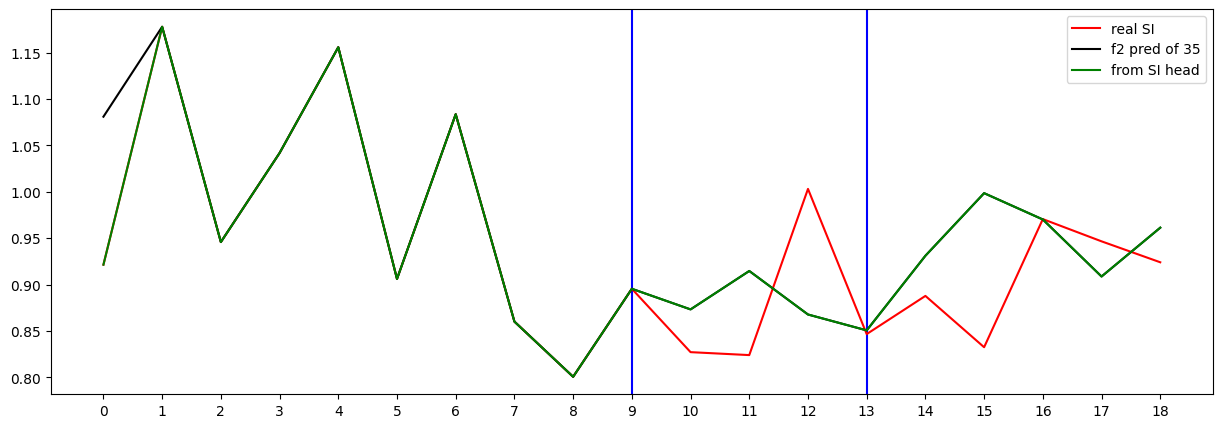

Testing R**2 - (all) - (no inputs):  0.9989251251283899
Testing R**2 - (f2) - SI full (no inputs):  0.21515291968798522
Testing R**2 - SI head only (no inputs):  0.21515291968798522
0 ...index R**2 (no inputs):  0.13316133746757886
1 ...index R**2 (no inputs):  0.012457564616463856
2 ...index R**2 (no inputs):  0.21515291968798522
3 ...index R**2 (no inputs):  0.4378277866139463
4 ...index R**2 (no inputs):  -0.19690509926940525
5 ...index R**2 (no inputs):  0.16803529732739386
6 ...index R**2 (no inputs):  -5.2141132202259515
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.24155984284021925
10 ...index R**2 (no inputs):  -0.5320722096495798
11 ...index R**2 (no inputs):  -98.89657592773438
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1543368047327793
16 ...index R**2 (no inputs):  -1.7343336380119285
17 ...index R**2 (no inputs):  -179.1994

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.227735
Loss_SI: 1.3859752416610718 Loss_all: 1.2282075881958008
===
[200] Train Loss: 0.201643
Loss_SI: 0.6432806849479675 Loss_all: 0.42854082584381104
===
[400] Train Loss: 0.073951
Loss_SI: 0.4863647520542145 Loss_all: 0.3236783742904663
===
[600] Train Loss: 0.060822
Loss_SI: 0.503001868724823 Loss_all: 0.30700191855430603
===
[800] Train Loss: 0.032275
Loss_SI: 0.3703175485134125 Loss_all: 0.2727648913860321
===


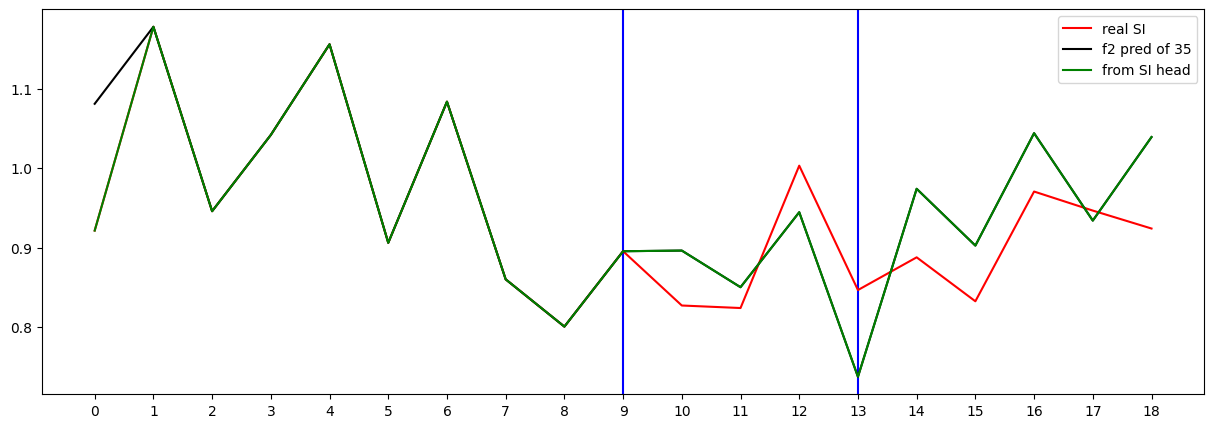

Testing R**2 - (all) - (no inputs):  0.9976052112272022
Testing R**2 - (f2) - SI full (no inputs):  -2.4237244068451327
Testing R**2 - SI head only (no inputs):  -2.4237244068451327
0 ...index R**2 (no inputs):  -3.4342383862836368
1 ...index R**2 (no inputs):  -0.28239939050133156
2 ...index R**2 (no inputs):  -2.4237244068451327
3 ...index R**2 (no inputs):  -0.08904590426292636
4 ...index R**2 (no inputs):  -0.27430054625657774
5 ...index R**2 (no inputs):  -1.0000017150722837
6 ...index R**2 (no inputs):  -2.286945138192082
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.37654605811127495
10 ...index R**2 (no inputs):  -1.339179431818772
11 ...index R**2 (no inputs):  -61.34909147024155
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5313686262980466
16 ...index R**2 (no inputs):  -0.11319553310449337
17 ...index R**2 (no inputs):  -64.9082

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.483378
Loss_SI: 1.764350175857544 Loss_all: 1.3776054382324219
===
[200] Train Loss: 0.207885
Loss_SI: 0.6915386319160461 Loss_all: 0.43071505427360535
===
[400] Train Loss: 0.103043
Loss_SI: 0.42610055208206177 Loss_all: 0.3771318197250366
===
[600] Train Loss: 0.066827
Loss_SI: 0.3367171287536621 Loss_all: 0.294443815946579
===
[800] Train Loss: 0.084922
Loss_SI: 0.3918866217136383 Loss_all: 0.30418768525123596
===


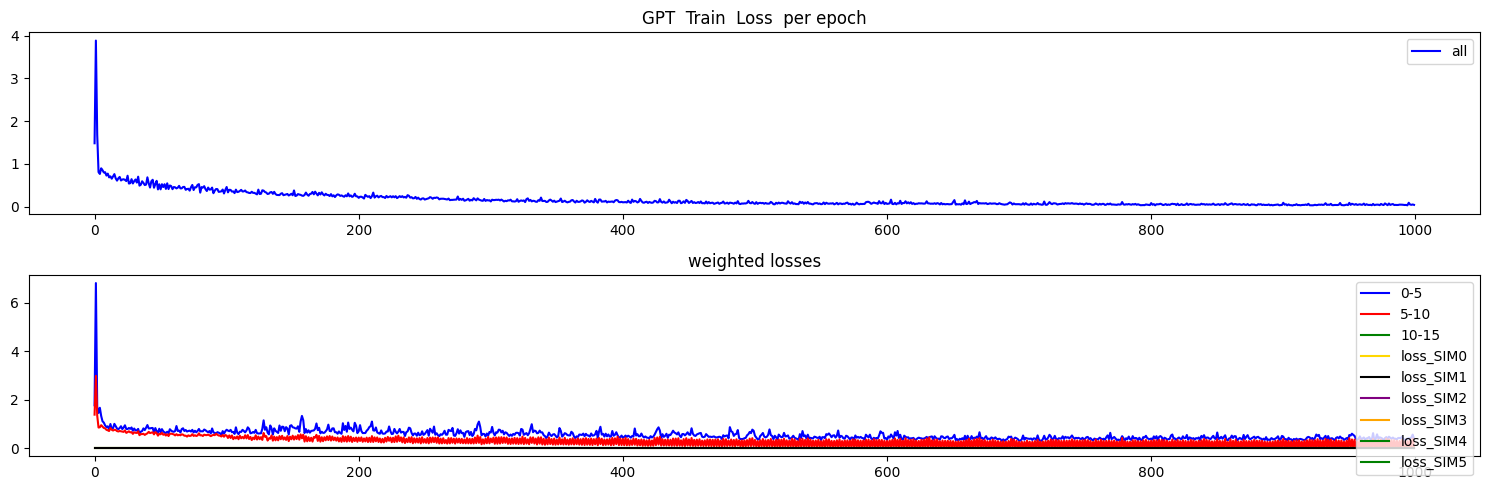

Testing R**2 - (all) - (no inputs):  0.9982808075930407
Testing R**2 - (f2) - SI full (no inputs):  -1.3556294606656563
Testing R**2 - SI head only (no inputs):  -1.3556294606656563
0 ...index R**2 (no inputs):  -0.5591596838662276
1 ...index R**2 (no inputs):  -0.10082432359967664
2 ...index R**2 (no inputs):  -1.3556294606656563
3 ...index R**2 (no inputs):  0.07846503843864916
4 ...index R**2 (no inputs):  -0.21238129796096494
5 ...index R**2 (no inputs):  -0.38613849402359834
6 ...index R**2 (no inputs):  -17.040356284739783
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0357180578759444
10 ...index R**2 (no inputs):  -0.7671731449712891
11 ...index R**2 (no inputs):  -64.15773841738701
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9366281344337568
16 ...index R**2 (no inputs):  -0.12068406801131437
17 ...index R**2 (no inputs):  -146.46

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.214799
Loss_SI: 1.287445306777954 Loss_all: 1.223854660987854
===
[200] Train Loss: 0.065228
Loss_SI: 0.7972525954246521 Loss_all: 0.39274609088897705
===
[400] Train Loss: 0.033394
Loss_SI: 0.9631113409996033 Loss_all: 0.4377948045730591
===
[600] Train Loss: 0.032851
Loss_SI: 0.8119656443595886 Loss_all: 0.4193490445613861
===
[800] Train Loss: 0.017147
Loss_SI: 0.6687432527542114 Loss_all: 0.36802616715431213
===


Testing R**2 - (all) - (no inputs):  0.7747288777401229
Testing R**2 - (f2) - SI full (no inputs):  -2.273421574429777
Testing R**2 - SI head only (no inputs):  -2.273421574429777
0 ...index R**2 (no inputs):  -0.8006249376365824
1 ...index R**2 (no inputs):  -3.572946370238668
2 ...index R**2 (no inputs):  -2.273421574429777
3 ...index R**2 (no inputs):  -37.91755876420865
4 ...index R**2 (no inputs):  -22445.23685088939
5 ...index R**2 (no inputs):  -111.78290507169437
6 ...index R**2 (no inputs):  -37.51269376921184
7 ...index R**2 (no inputs):  -5247.583642741094
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.6352412735327895
10 ...index R**2 (no inputs):  -0.0727028369378322
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0100330107697815
16 ...index R**2 (no inputs):  -63.10417526641008
17 ...index R**2 (no inputs):  -10.211683819067643

[0] Train Loss: 1.288726
Loss_SI: 1.3151352405548096 Loss_all: 1.375657081604004
===
[200] Train Loss: 0.111690
Loss_SI: 0.6802052855491638 Loss_all: 0.43507471680641174
===
[400] Train Loss: 0.069280
Loss_SI: 0.45091769099235535 Loss_all: 0.3697880208492279
===
[600] Train Loss: 0.067835
Loss_SI: 0.5939028859138489 Loss_all: 0.391378790140152
===
[800] Train Loss: 0.032144
Loss_SI: 0.40441298484802246 Loss_all: 0.35135650634765625
===


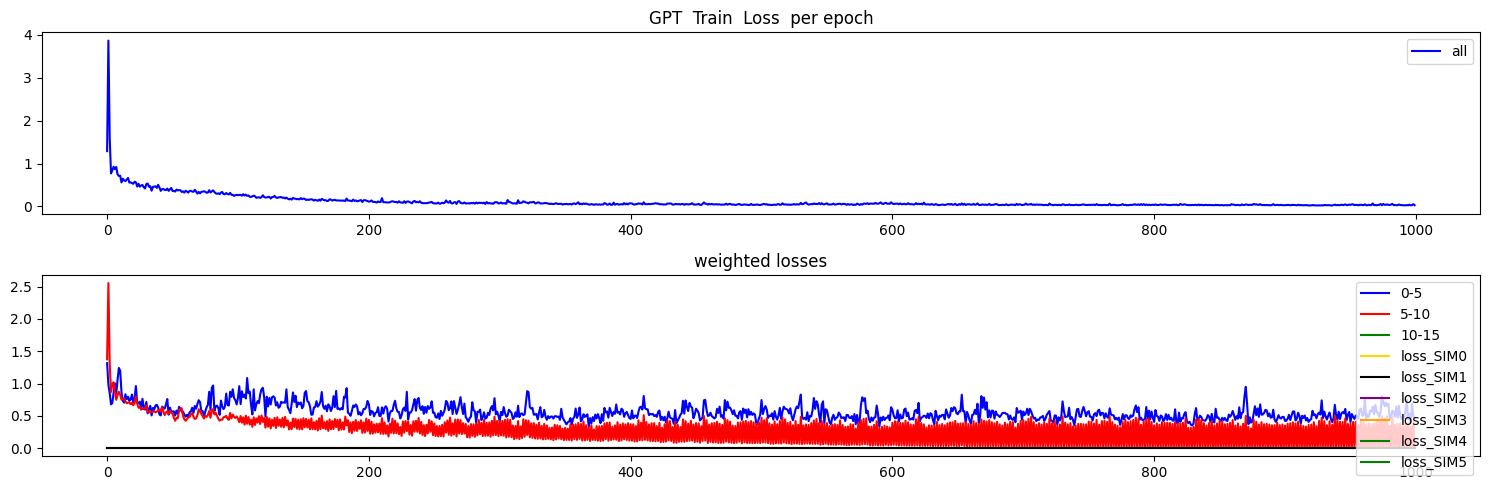

Testing R**2 - (all) - (no inputs):  0.9117054183225386
Testing R**2 - (f2) - SI full (no inputs):  -13.890082582418296
Testing R**2 - SI head only (no inputs):  -13.890082582418296
0 ...index R**2 (no inputs):  -3.5646268672945487
1 ...index R**2 (no inputs):  -5.616040094943578
2 ...index R**2 (no inputs):  -13.890082582418296
3 ...index R**2 (no inputs):  -48.48447934933512
4 ...index R**2 (no inputs):  -371.37654355712806
5 ...index R**2 (no inputs):  -42.88543665693637
6 ...index R**2 (no inputs):  -1919.8965262169859
7 ...index R**2 (no inputs):  -86.55077798889467
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.2821247174710726
10 ...index R**2 (no inputs):  -1.266631085521908
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -34.95483676322383
16 ...index R**2 (no inputs):  -53.02950394667739
17 ...index R**2 (no inputs):  -112.9095353114247

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.204101
Loss_SI: 1.9802788496017456 Loss_all: 1.2788186073303223
===
[200] Train Loss: 0.192119
Loss_SI: 0.35141801834106445 Loss_all: 0.29822462797164917
===
[400] Train Loss: 0.066111
Loss_SI: 0.26425445079803467 Loss_all: 0.2550423741340637
===
[600] Train Loss: 0.077944
Loss_SI: 0.24131856858730316 Loss_all: 0.24097277224063873
===
[800] Train Loss: 0.060184
Loss_SI: 0.2689370810985565 Loss_all: 0.239009827375412
===


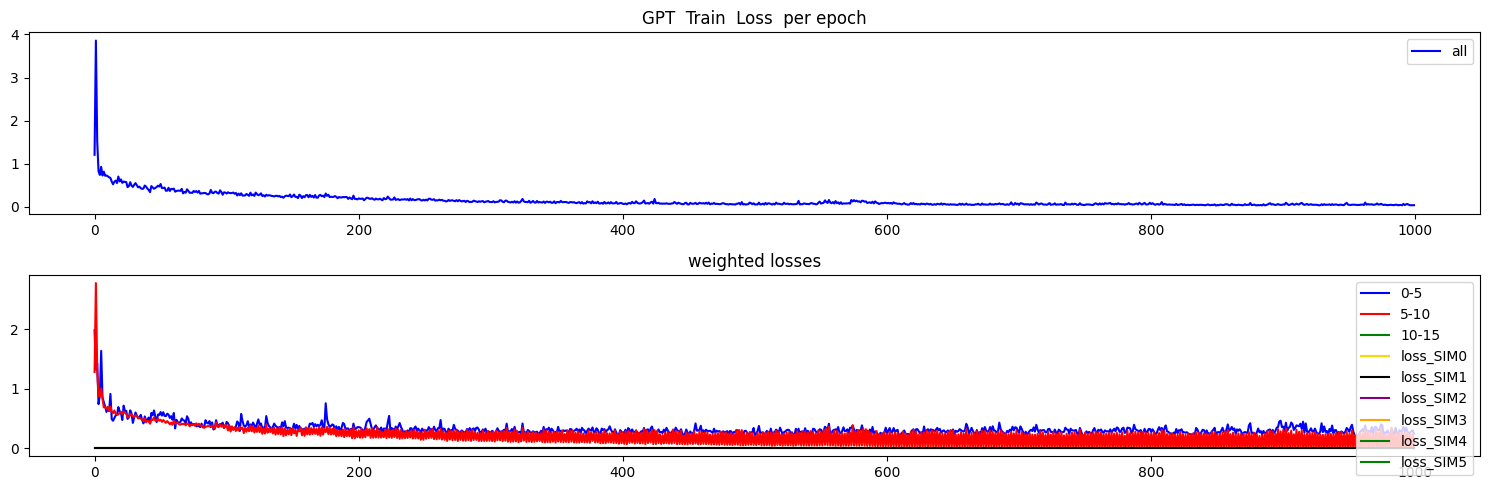

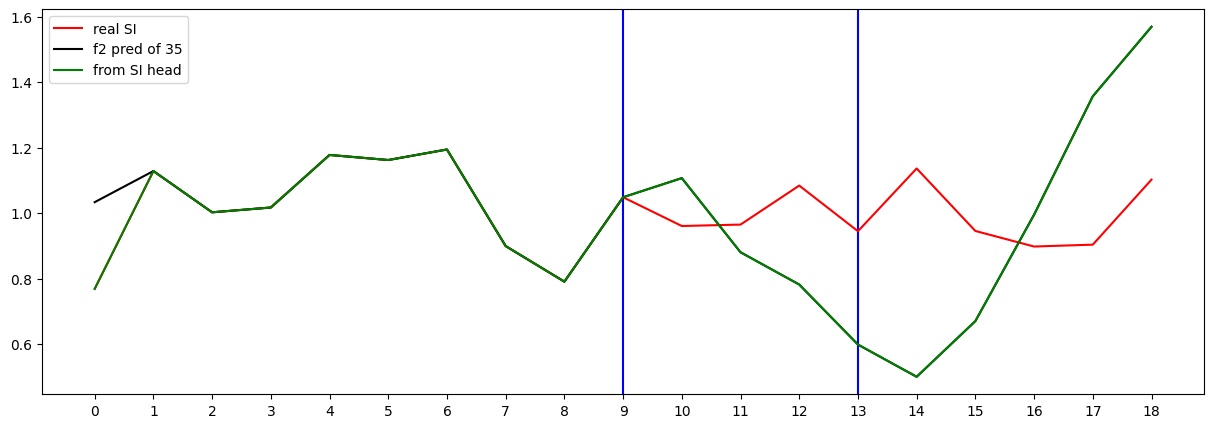

Testing R**2 - (all) - (no inputs):  0.9397974696529907
Testing R**2 - (f2) - SI full (no inputs):  -11.244153954644213
Testing R**2 - SI head only (no inputs):  -11.244153954644213
0 ...index R**2 (no inputs):  -1.191368450091523
1 ...index R**2 (no inputs):  -4.4237187140958545
2 ...index R**2 (no inputs):  -11.244153954644213
3 ...index R**2 (no inputs):  -35.20211639236815
4 ...index R**2 (no inputs):  -282.4564667967792
5 ...index R**2 (no inputs):  -28.861398671487915
6 ...index R**2 (no inputs):  -153.6274517167945
7 ...index R**2 (no inputs):  -34.861077334044666
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.025215008114801707
10 ...index R**2 (no inputs):  -0.8594294921948669
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -12.24066974909212
16 ...index R**2 (no inputs):  -44.433310718105425
17 ...index R**2 (no inputs):  -237.128449976

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


[0] Train Loss: 1.015504
Loss_SI: 0.9072839617729187 Loss_all: 1.2055336236953735
===
[200] Train Loss: 0.218308
Loss_SI: 0.3869222402572632 Loss_all: 0.30448994040489197
===
[400] Train Loss: 0.107967
Loss_SI: 0.306145042181015 Loss_all: 0.25614938139915466
===
[600] Train Loss: 0.060940
Loss_SI: 0.33453303575515747 Loss_all: 0.25487300753593445
===
[800] Train Loss: 0.048133
Loss_SI: 0.2734163999557495 Loss_all: 0.23750841617584229
===


Testing R**2 - (all) - (no inputs):  0.8338960266956682
Testing R**2 - (f2) - SI full (no inputs):  -18.40326482428182
Testing R**2 - SI head only (no inputs):  -18.40326482428182
0 ...index R**2 (no inputs):  -1.504673661552152
1 ...index R**2 (no inputs):  -8.761524891924438
2 ...index R**2 (no inputs):  -18.40326482428182
3 ...index R**2 (no inputs):  -30.45579364444748
4 ...index R**2 (no inputs):  -4339.06697795222
5 ...index R**2 (no inputs):  -81.82809947451958
6 ...index R**2 (no inputs):  -1340.7709564588622
7 ...index R**2 (no inputs):  -566.0527400312791
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.41337914075464344
10 ...index R**2 (no inputs):  -0.8691250415443827
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -20.034444574462235
16 ...index R**2 (no inputs):  -65.19065619894207
17 ...index R**2 (no inputs):  -297.2758411801071
1


## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.971788
Loss_SI: 1.0427671670913696 Loss_all: 1.0673712491989136
===
[200] Train Loss: 0.075928
Loss_SI: 0.24549894034862518 Loss_all: 0.2754880487918854
===
[400] Train Loss: 0.030010
Loss_SI: 0.26612740755081177 Loss_all: 0.26564139127731323
===
[600] Train Loss: 0.017986
Loss_SI: 0.18262873589992523 Loss_all: 0.24858702719211578
===
[800] Train Loss: 0.017287
Loss_SI: 0.2516367733478546 Loss_all: 0.2806245982646942
===


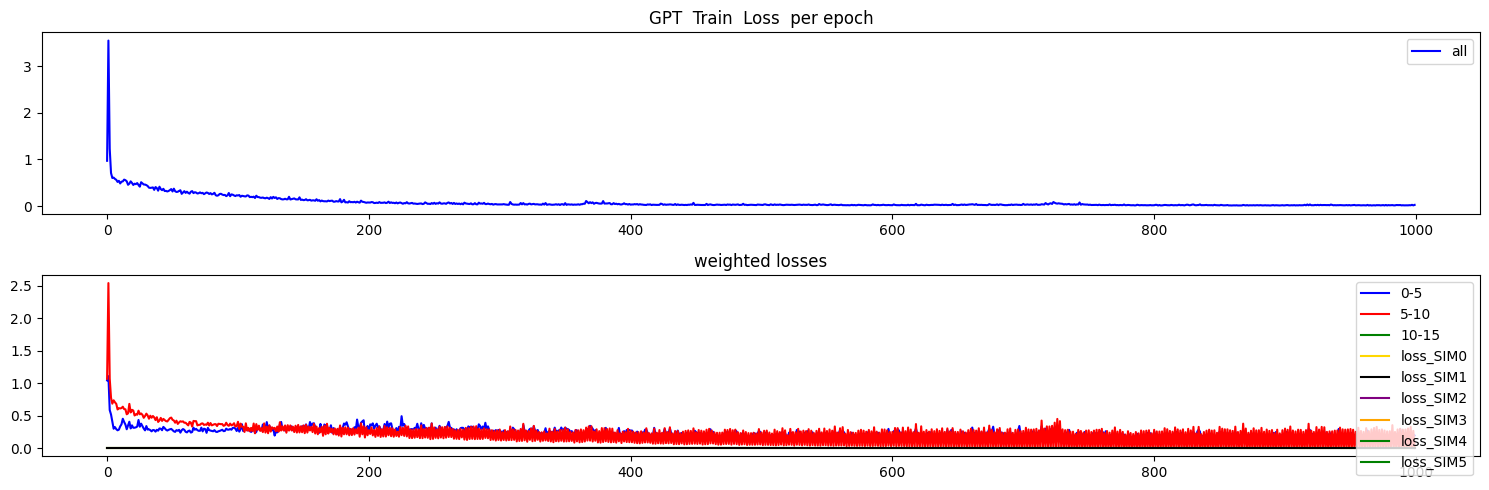

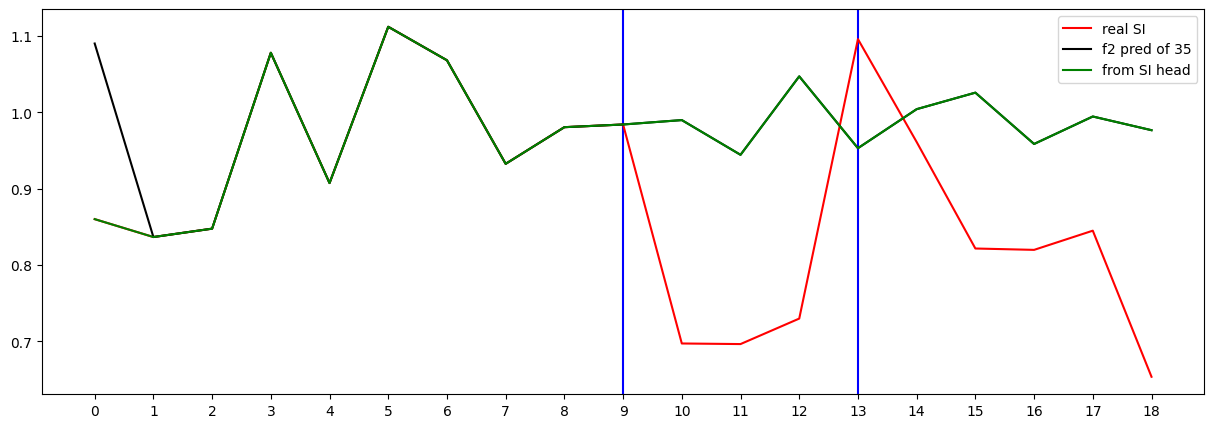

Testing R**2 - (all) - (no inputs):  0.9923076937070846
Testing R**2 - (f2) - SI full (no inputs):  -1.3824392127582041
Testing R**2 - SI head only (no inputs):  -1.3824392127582041
0 ...index R**2 (no inputs):  0.04497349901318559
1 ...index R**2 (no inputs):  -0.5871892571371313
2 ...index R**2 (no inputs):  -1.3824392127582041
3 ...index R**2 (no inputs):  -3.0710030584054095
4 ...index R**2 (no inputs):  -8.11419059893721
5 ...index R**2 (no inputs):  -1.0515487424829448
6 ...index R**2 (no inputs):  -3.4309957443119794
7 ...index R**2 (no inputs):  -0.37417319323678067
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5832792183329811
10 ...index R**2 (no inputs):  0.1936444968707206
11 ...index R**2 (no inputs):  -32.590248318511044
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.6123275523967546
16 ...index R**2 (no inputs):  -0.6031669331499239
17 ...index R**2 (no inputs

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.194926
Loss_SI: 1.3005053997039795 Loss_all: 1.236114740371704
===
[200] Train Loss: 0.123668
Loss_SI: 0.18777304887771606 Loss_all: 0.27646297216415405
===
[400] Train Loss: 0.053322
Loss_SI: 0.22611375153064728 Loss_all: 0.29817503690719604
===
[600] Train Loss: 0.045284
Loss_SI: 0.16509337723255157 Loss_all: 0.24467721581459045
===
[800] Train Loss: 0.026151
Loss_SI: 0.24726910889148712 Loss_all: 0.24225594103336334
===


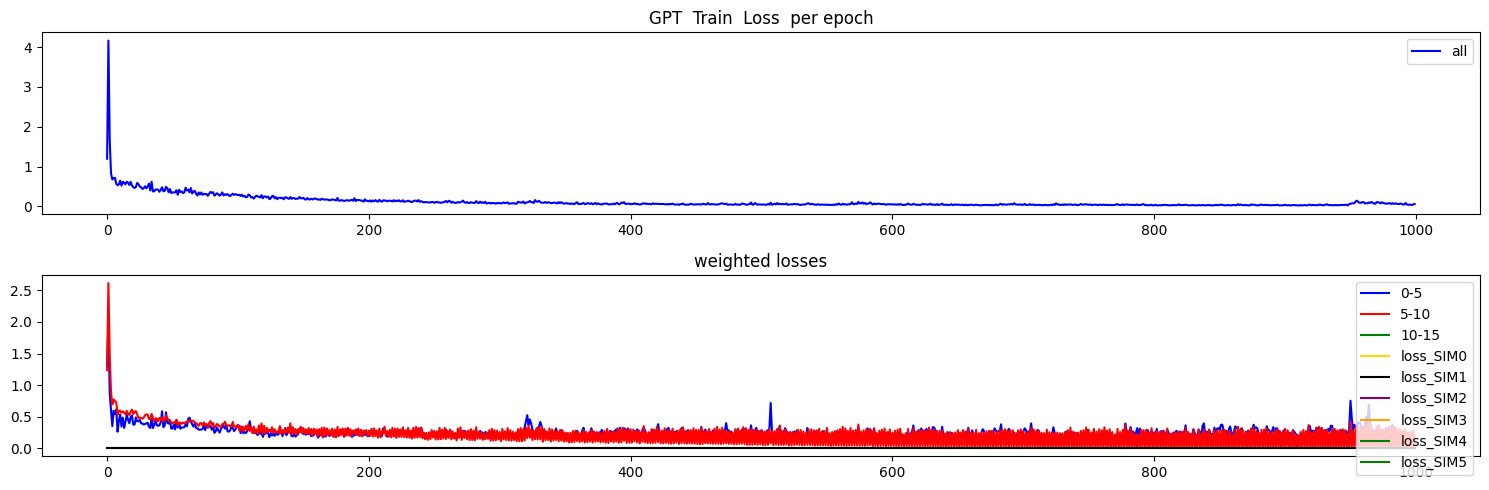

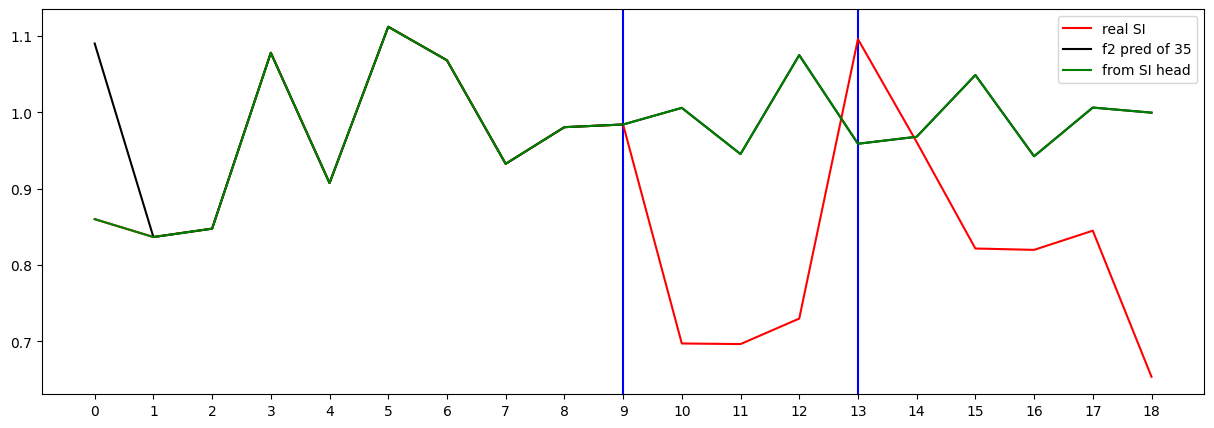

Testing R**2 - (all) - (no inputs):  0.9888359567059817
Testing R**2 - (f2) - SI full (no inputs):  -1.4959492371289795
Testing R**2 - SI head only (no inputs):  -1.4959492371289795
0 ...index R**2 (no inputs):  -0.008084041146131371
1 ...index R**2 (no inputs):  -1.4785269070243632
2 ...index R**2 (no inputs):  -1.4959492371289795
3 ...index R**2 (no inputs):  -3.807505512492157
4 ...index R**2 (no inputs):  -573.0253719693694
5 ...index R**2 (no inputs):  -1.9811154937852553
6 ...index R**2 (no inputs):  -1.5674023098120409
7 ...index R**2 (no inputs):  -27.5577855422618
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8662263200954365
10 ...index R**2 (no inputs):  0.16882585348310786
11 ...index R**2 (no inputs):  -7.0258482754649485
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.867203362539611
16 ...index R**2 (no inputs):  -0.3361414276131167
17 ...index R**2 (no inputs)

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.378230
Loss_SI: 1.2222131490707397 Loss_all: 1.339555263519287
===
[200] Train Loss: 0.215382
Loss_SI: 0.22334623336791992 Loss_all: 0.30047187209129333
===
[400] Train Loss: 0.113608
Loss_SI: 0.19872704148292542 Loss_all: 0.252440482378006
===
[600] Train Loss: 0.043619
Loss_SI: 0.15207938849925995 Loss_all: 0.20862255990505219
===
[800] Train Loss: 0.041126
Loss_SI: 0.24148789048194885 Loss_all: 0.20119628310203552
===


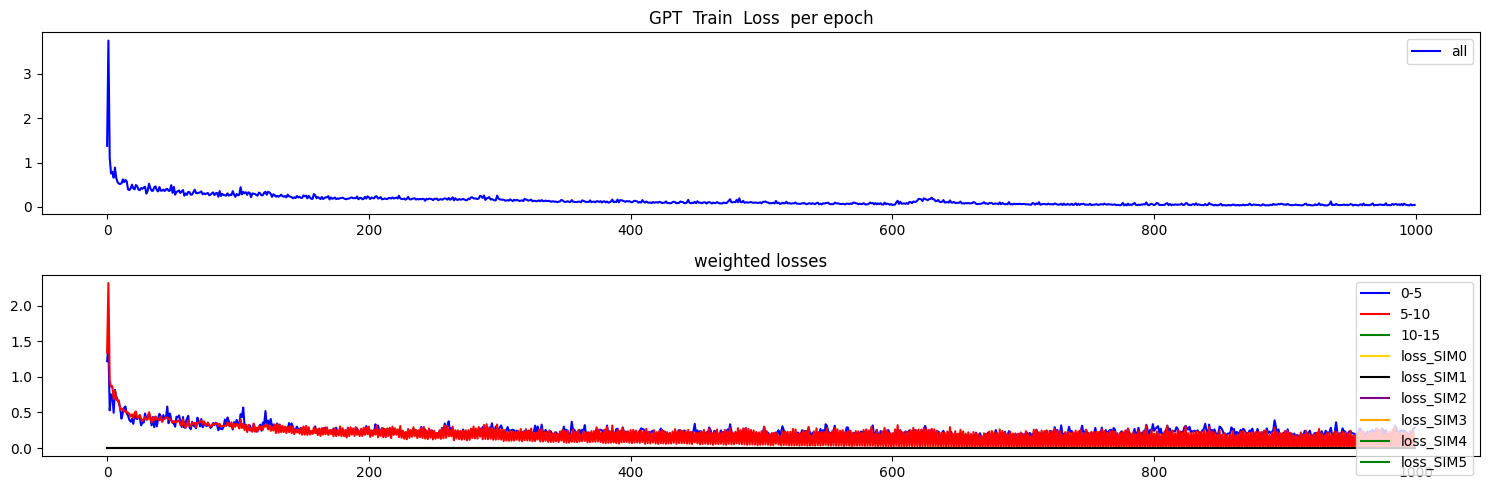

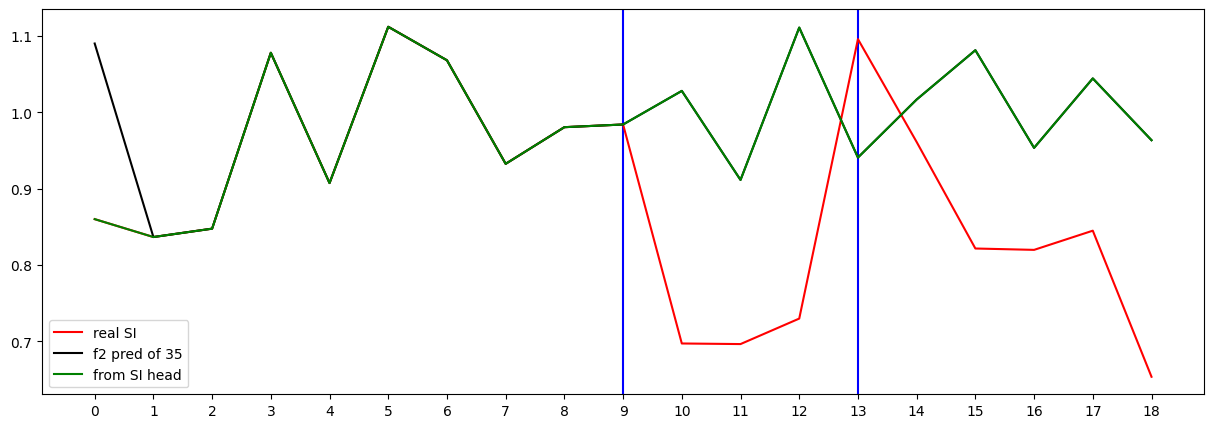

Testing R**2 - (all) - (no inputs):  0.9788869591459984
Testing R**2 - (f2) - SI full (no inputs):  -1.8707380522208812
Testing R**2 - SI head only (no inputs):  -1.8707380522208812
0 ...index R**2 (no inputs):  -0.16316965447222476
1 ...index R**2 (no inputs):  -2.283004516161605
2 ...index R**2 (no inputs):  -1.8707380522208812
3 ...index R**2 (no inputs):  -4.481815595832842
4 ...index R**2 (no inputs):  -736.7110509762365
5 ...index R**2 (no inputs):  -4.6329233358390205
6 ...index R**2 (no inputs):  -6.1844494469943765
7 ...index R**2 (no inputs):  -54.00903823253525
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5648478188587505
10 ...index R**2 (no inputs):  0.07248988009616719
11 ...index R**2 (no inputs):  -50.49976825159477
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.7655417596520016
16 ...index R**2 (no inputs):  -1.2415504540207722
17 ...index R**2 (no inputs):

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.627538
Loss_SI: 2.106881856918335 Loss_all: 1.436854362487793
===
[200] Train Loss: 0.196450
Loss_SI: 0.23494958877563477 Loss_all: 0.27857473492622375
===
[400] Train Loss: 0.121446
Loss_SI: 0.17983153462409973 Loss_all: 0.2386537790298462
===
[600] Train Loss: 0.080211
Loss_SI: 0.1839732676744461 Loss_all: 0.23002083599567413
===
[800] Train Loss: 0.056350
Loss_SI: 0.27676907181739807 Loss_all: 0.2400997430086136
===


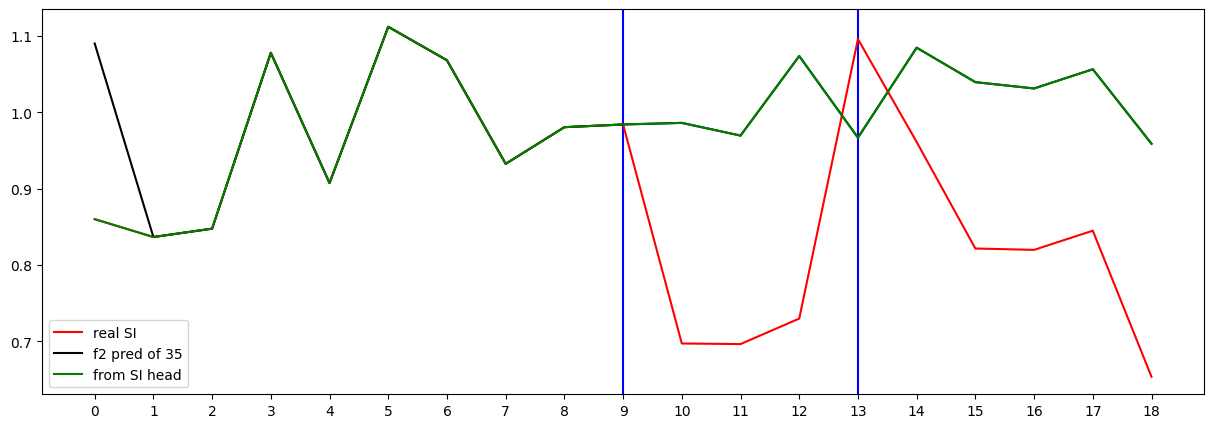

Testing R**2 - (all) - (no inputs):  0.9930821200269532
Testing R**2 - (f2) - SI full (no inputs):  -2.1460473351827796
Testing R**2 - SI head only (no inputs):  -2.1460473351827796
0 ...index R**2 (no inputs):  -0.04195941290325922
1 ...index R**2 (no inputs):  -1.3468826476818307
2 ...index R**2 (no inputs):  -2.1460473351827796
3 ...index R**2 (no inputs):  -2.5429597698503352
4 ...index R**2 (no inputs):  -770.6214378132591
5 ...index R**2 (no inputs):  -0.8325896979963663
6 ...index R**2 (no inputs):  -10.661319528693339
7 ...index R**2 (no inputs):  -128.68471749535328
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5843429063818011
10 ...index R**2 (no inputs):  -0.7233782485510869
11 ...index R**2 (no inputs):  -32.260839497091645
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.82851059232043
16 ...index R**2 (no inputs):  -0.6755055325775257
17 ...index R**2 (no inputs

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.346222
Loss_SI: 1.548982858657837 Loss_all: 1.2199667692184448
===
[200] Train Loss: 0.070228
Loss_SI: 0.7159485220909119 Loss_all: 0.4726272225379944
===
[400] Train Loss: 0.046956
Loss_SI: 0.6740984320640564 Loss_all: 0.511144757270813
===
[600] Train Loss: 0.054946
Loss_SI: 0.6247438788414001 Loss_all: 0.5108224749565125
===
[800] Train Loss: 0.041054
Loss_SI: 0.599942147731781 Loss_all: 0.4893771708011627
===


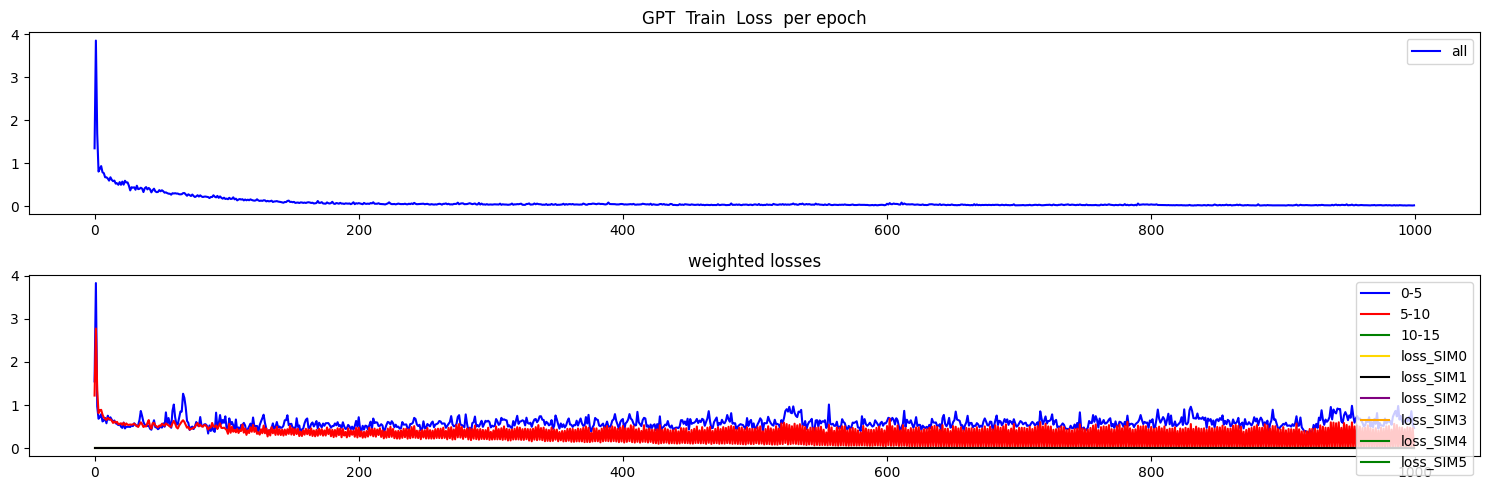

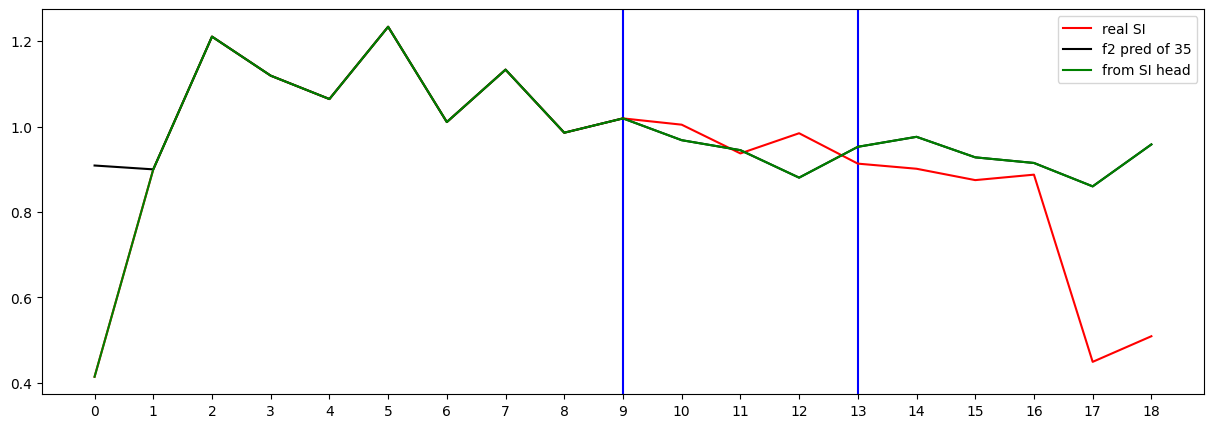

Testing R**2 - (all) - (no inputs):  0.9499665578588796
Testing R**2 - (f2) - SI full (no inputs):  -0.508489687072168
Testing R**2 - SI head only (no inputs):  -0.508489687072168
0 ...index R**2 (no inputs):  -0.5887129550824952
1 ...index R**2 (no inputs):  -0.8586766282756928
2 ...index R**2 (no inputs):  -0.508489687072168
3 ...index R**2 (no inputs):  -12.469483869798545
4 ...index R**2 (no inputs):  -0.665693408547178
5 ...index R**2 (no inputs):  -5.027171077330032
6 ...index R**2 (no inputs):  -4.359167036482857
7 ...index R**2 (no inputs):  -95.93412485489517
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.08571622480806107
10 ...index R**2 (no inputs):  -1.2944567601796408
11 ...index R**2 (no inputs):  -225.1445017759445
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.08979020100512258
16 ...index R**2 (no inputs):  -0.2570765076690755
17 ...index R**2 (no inputs):  -

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.312579
Loss_SI: 1.514566421508789 Loss_all: 1.2014400959014893
===
[200] Train Loss: 0.141491
Loss_SI: 0.5534049868583679 Loss_all: 0.4331679344177246
===
[400] Train Loss: 0.044027
Loss_SI: 0.4419594705104828 Loss_all: 0.3139342665672302
===
[600] Train Loss: 0.056777
Loss_SI: 0.3972545266151428 Loss_all: 0.4041362702846527
===
[800] Train Loss: 0.028312
Loss_SI: 0.3260253965854645 Loss_all: 0.32108306884765625
===


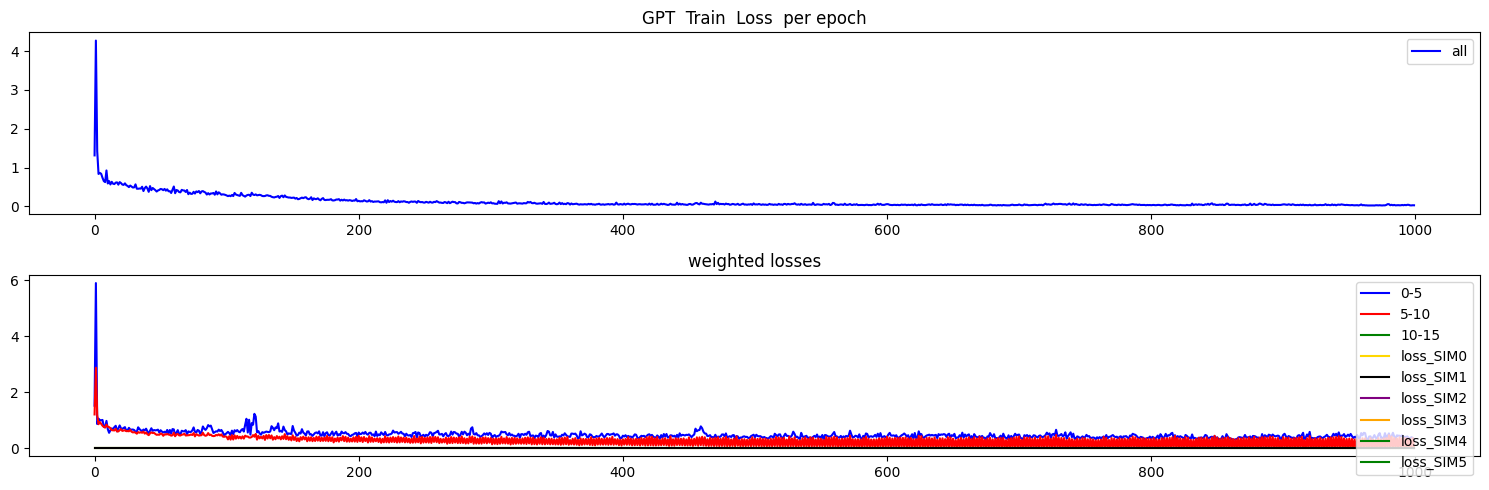

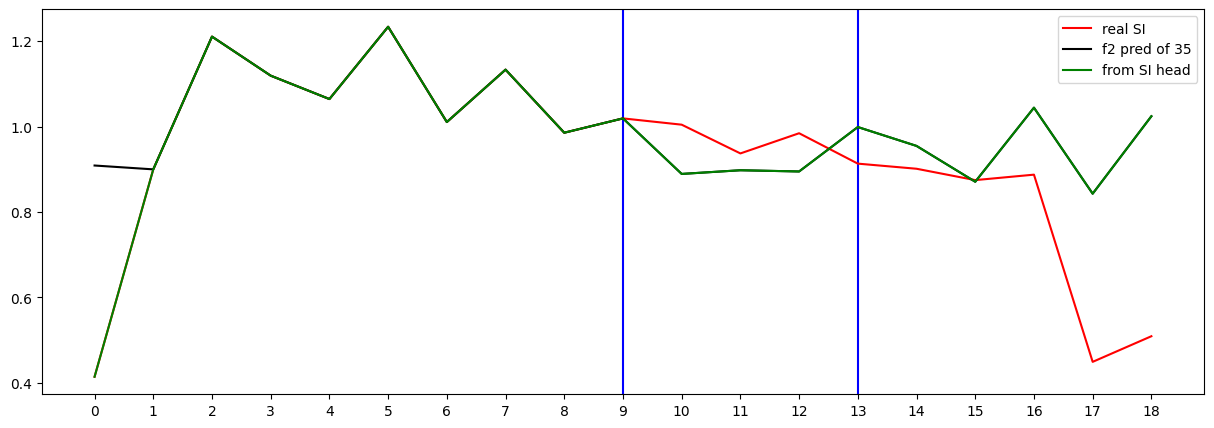

Testing R**2 - (all) - (no inputs):  0.9766373625821745
Testing R**2 - (f2) - SI full (no inputs):  -0.9926469889610754
Testing R**2 - SI head only (no inputs):  -0.9926469889610754
0 ...index R**2 (no inputs):  -2.0519010401166144
1 ...index R**2 (no inputs):  -2.3729006590576245
2 ...index R**2 (no inputs):  -0.9926469889610754
3 ...index R**2 (no inputs):  -4.442285747041828
4 ...index R**2 (no inputs):  -0.49926949040718327
5 ...index R**2 (no inputs):  -1.7999932941683099
6 ...index R**2 (no inputs):  -6.7881876881490655
7 ...index R**2 (no inputs):  -61.21216743618813
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.19873880197133986
10 ...index R**2 (no inputs):  -0.8640024500069814
11 ...index R**2 (no inputs):  -240.8824158108043
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.030580602585102756
16 ...index R**2 (no inputs):  -0.6048631807486404
17 ...index R**2 (no inp

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.452420
Loss_SI: 1.8132038116455078 Loss_all: 1.3440799713134766
===
[200] Train Loss: 0.182962
Loss_SI: 0.3516605496406555 Loss_all: 0.310707688331604
===
[400] Train Loss: 0.093091
Loss_SI: 0.24359147250652313 Loss_all: 0.3005117177963257
===
[600] Train Loss: 0.060707
Loss_SI: 0.2542642056941986 Loss_all: 0.2806587815284729
===
[800] Train Loss: 0.029620
Loss_SI: 0.24626679718494415 Loss_all: 0.2232980579137802
===


Testing R**2 - (all) - (no inputs):  0.9770537421478394
Testing R**2 - (f2) - SI full (no inputs):  -0.22570191637699866
Testing R**2 - SI head only (no inputs):  -0.22570191637699866
0 ...index R**2 (no inputs):  -1.553267063659109
1 ...index R**2 (no inputs):  -2.1880140967075703
2 ...index R**2 (no inputs):  -0.22570191637699866
3 ...index R**2 (no inputs):  0.469435622391269
4 ...index R**2 (no inputs):  -42.59615201121849
5 ...index R**2 (no inputs):  -1.737238432369514
6 ...index R**2 (no inputs):  -7.806313981194776
7 ...index R**2 (no inputs):  -62.77151119925099
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9814508863902278
10 ...index R**2 (no inputs):  -1.4531723248921402
11 ...index R**2 (no inputs):  -53.05240773536733
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4579369240200506
16 ...index R**2 (no inputs):  -0.5068268413788157
17 ...index R**2 (no inputs): 

[0] Train Loss: 1.354182
Loss_SI: 1.2644575834274292 Loss_all: 1.331313967704773
===
[200] Train Loss: 0.209472
Loss_SI: 0.4802258610725403 Loss_all: 0.31659454107284546
===
[400] Train Loss: 0.104275
Loss_SI: 0.29876232147216797 Loss_all: 0.26781702041625977
===
[600] Train Loss: 0.091510
Loss_SI: 0.24902664124965668 Loss_all: 0.26565203070640564
===
[800] Train Loss: 0.053286
Loss_SI: 0.2394101470708847 Loss_all: 0.23723448812961578
===


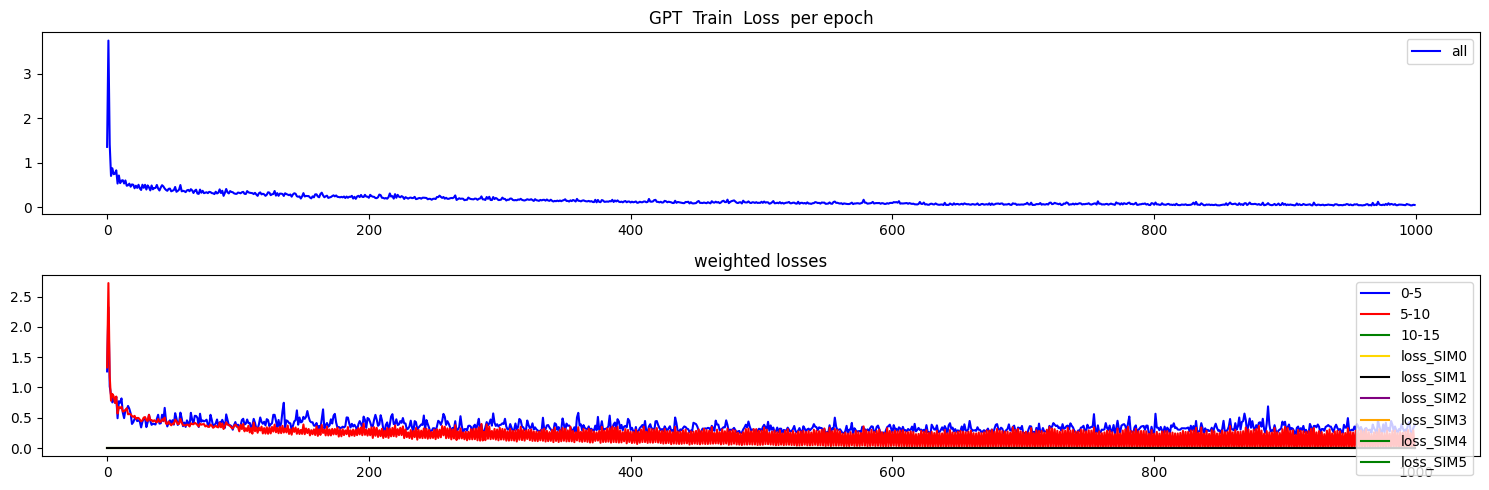

Testing R**2 - (all) - (no inputs):  0.9692891715345694
Testing R**2 - (f2) - SI full (no inputs):  0.10939034830764238
Testing R**2 - SI head only (no inputs):  0.10939034830764238
0 ...index R**2 (no inputs):  0.1312740229800965
1 ...index R**2 (no inputs):  -3.071633199921358
2 ...index R**2 (no inputs):  0.10939034830764238
3 ...index R**2 (no inputs):  0.0991998606972685
4 ...index R**2 (no inputs):  -11.973741513660647
5 ...index R**2 (no inputs):  -2.703031488625012
6 ...index R**2 (no inputs):  -13.330246570009884
7 ...index R**2 (no inputs):  -32.3192376090521
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7306722167537287
10 ...index R**2 (no inputs):  0.4855663609970573
11 ...index R**2 (no inputs):  -169.61901316121424
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.3306751112950614
16 ...index R**2 (no inputs):  -0.03943750997536566
17 ...index R**2 (no inputs):  

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.271538
Loss_SI: 1.3621224164962769 Loss_all: 1.2560909986495972
===
[200] Train Loss: 0.064927
Loss_SI: 0.7558919787406921 Loss_all: 0.39044010639190674
===
[400] Train Loss: 0.029903
Loss_SI: 0.6567595601081848 Loss_all: 0.3413873612880707
===
[600] Train Loss: 0.030246
Loss_SI: 0.47040972113609314 Loss_all: 0.31338754296302795
===
[800] Train Loss: 0.015658
Loss_SI: 0.4608209729194641 Loss_all: 0.3205947279930115
===


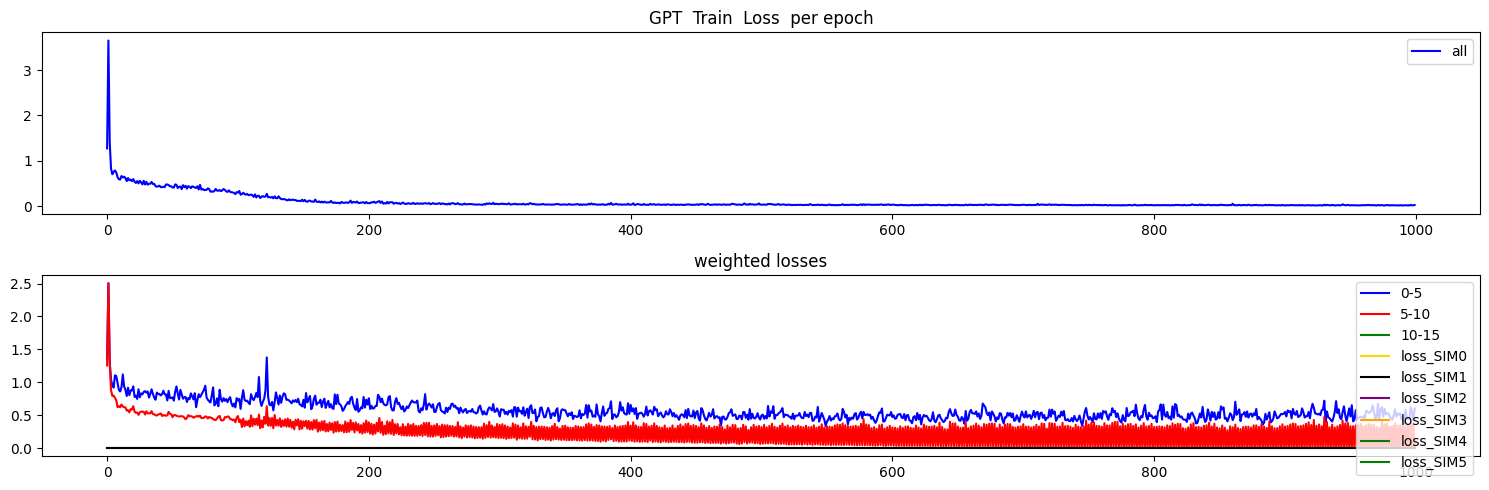

Testing R**2 - (all) - (no inputs):  0.9611292464563235
Testing R**2 - (f2) - SI full (no inputs):  -1.0818898775861285
Testing R**2 - SI head only (no inputs):  -1.0818898775861285
0 ...index R**2 (no inputs):  -0.5306313284239448
1 ...index R**2 (no inputs):  -1.4548095789248507
2 ...index R**2 (no inputs):  -1.0818898775861285
3 ...index R**2 (no inputs):  -0.35748965493549933
4 ...index R**2 (no inputs):  -0.8985452809019274
5 ...index R**2 (no inputs):  -0.4019448582403782
6 ...index R**2 (no inputs):  -0.25924131788467886
7 ...index R**2 (no inputs):  -259.00812389643727
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6834286210170839
10 ...index R**2 (no inputs):  -0.9172641413822826
11 ...index R**2 (no inputs):  -37.326365771406444
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5452709857474134
16 ...index R**2 (no inputs):  -0.49740744857087216
17 ...index R**2 (no i

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.315257
Loss_SI: 1.3130158185958862 Loss_all: 1.2980109453201294
===
[200] Train Loss: 0.168437
Loss_SI: 0.22588787972927094 Loss_all: 0.2957741618156433
===
[400] Train Loss: 0.065763
Loss_SI: 0.17767372727394104 Loss_all: 0.2657281160354614
===
[600] Train Loss: 0.032223
Loss_SI: 0.281655877828598 Loss_all: 0.25486916303634644
===
[800] Train Loss: 0.057214
Loss_SI: 0.2920565605163574 Loss_all: 0.2593766748905182
===


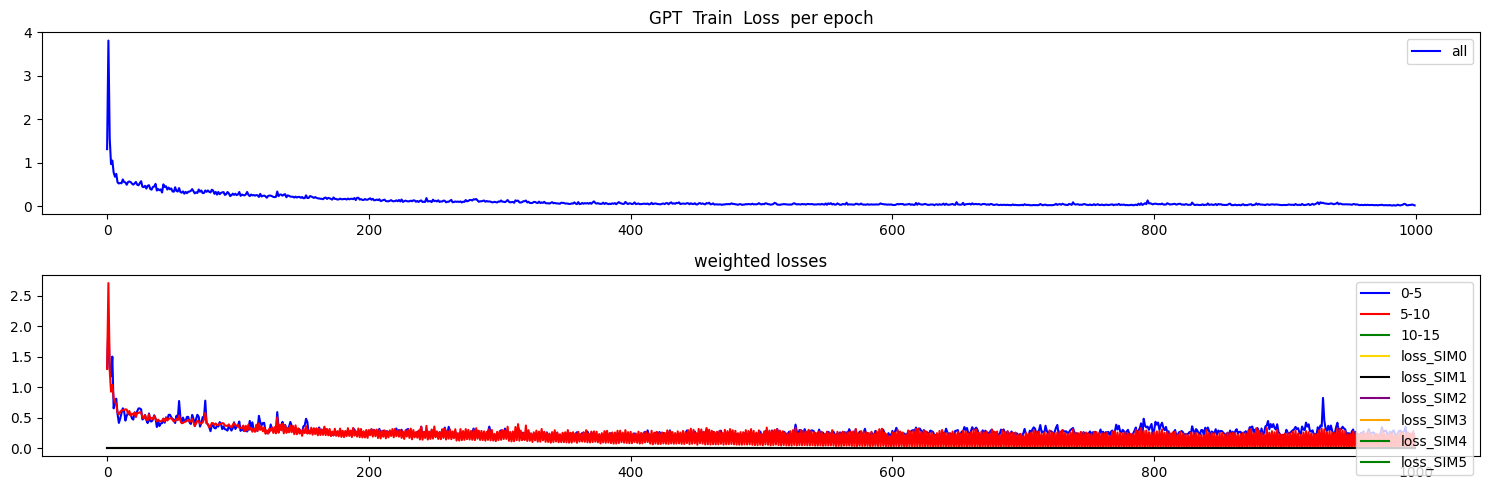

Testing R**2 - (all) - (no inputs):  0.9545582143265813
Testing R**2 - (f2) - SI full (no inputs):  -1.0892020032375522
Testing R**2 - SI head only (no inputs):  -1.0892020032375522
0 ...index R**2 (no inputs):  -0.07527013720429787
1 ...index R**2 (no inputs):  -0.9003278397396988
2 ...index R**2 (no inputs):  -1.0892020032375522
3 ...index R**2 (no inputs):  -0.367686748846932
4 ...index R**2 (no inputs):  -8.369404465885328
5 ...index R**2 (no inputs):  -0.6403343668421222
6 ...index R**2 (no inputs):  -2.66418766710889
7 ...index R**2 (no inputs):  -4105.5460381114735
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.25926351440442397
10 ...index R**2 (no inputs):  0.9314898470103996
11 ...index R**2 (no inputs):  -29.265354168289413
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9463906864363982
16 ...index R**2 (no inputs):  -0.4139729874064819
17 ...index R**2 (no inputs)

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.198322
Loss_SI: 1.529272437095642 Loss_all: 1.283309817314148
===
[200] Train Loss: 0.167757
Loss_SI: 0.24862508475780487 Loss_all: 0.28658008575439453
===
[400] Train Loss: 0.090926
Loss_SI: 0.21156613528728485 Loss_all: 0.2630009949207306
===
[600] Train Loss: 0.051541
Loss_SI: 0.21530671417713165 Loss_all: 0.25070926547050476
===
[800] Train Loss: 0.098834
Loss_SI: 0.34573596715927124 Loss_all: 0.3081168532371521
===


Testing R**2 - (all) - (no inputs):  0.9540392510994489
Testing R**2 - (f2) - SI full (no inputs):  -0.7677119592711121
Testing R**2 - SI head only (no inputs):  -0.7677119592711121
0 ...index R**2 (no inputs):  0.2186982261927899
1 ...index R**2 (no inputs):  -0.3353666399532238
2 ...index R**2 (no inputs):  -0.7677119592711121
3 ...index R**2 (no inputs):  -0.3671644957684912
4 ...index R**2 (no inputs):  -22.973809366908746
5 ...index R**2 (no inputs):  -0.6575097773863745
6 ...index R**2 (no inputs):  -1.6007037583464534
7 ...index R**2 (no inputs):  -8493.002050450921
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.12995572618628726
10 ...index R**2 (no inputs):  0.02027487280174145
11 ...index R**2 (no inputs):  -72.33187339736662
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8288662872071924
16 ...index R**2 (no inputs):  -0.35572010373640284
17 ...index R**2 (no inputs

[0] Train Loss: 1.511927
Loss_SI: 1.6005470752716064 Loss_all: 1.4506443738937378
===
[200] Train Loss: 0.181525
Loss_SI: 0.2687232196331024 Loss_all: 0.26229360699653625
===
[400] Train Loss: 0.128988
Loss_SI: 0.28915438055992126 Loss_all: 0.26709315180778503
===
[600] Train Loss: 0.094129
Loss_SI: 0.35934901237487793 Loss_all: 0.2820630371570587
===
[800] Train Loss: 0.065046
Loss_SI: 0.19088046252727509 Loss_all: 0.23881225287914276
===


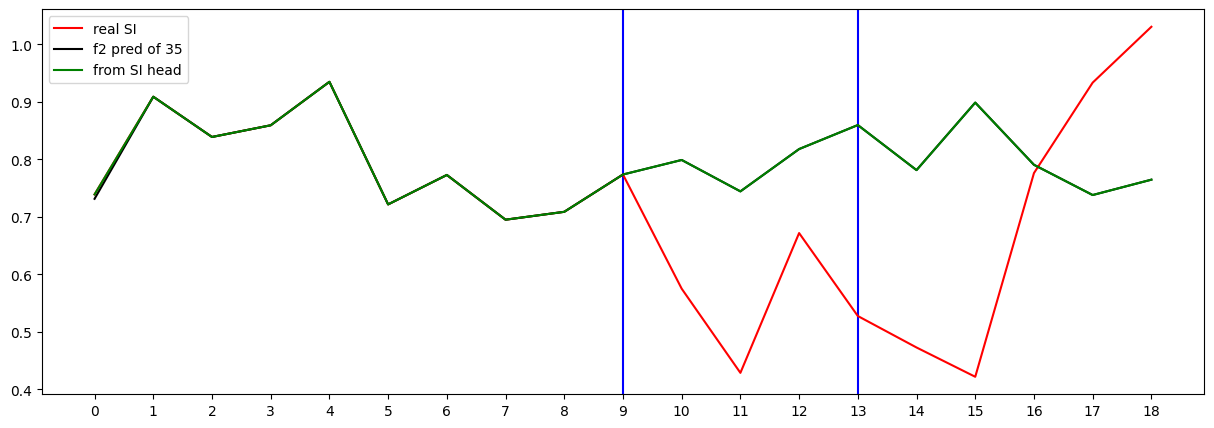

Testing R**2 - (all) - (no inputs):  0.9651764808002343
Testing R**2 - (f2) - SI full (no inputs):  -0.5906134699537797
Testing R**2 - SI head only (no inputs):  -0.5906134699537797
0 ...index R**2 (no inputs):  -0.20978913102878893
1 ...index R**2 (no inputs):  -0.413511613907942
2 ...index R**2 (no inputs):  -0.5906134699537797
3 ...index R**2 (no inputs):  0.13460541141610982
4 ...index R**2 (no inputs):  -2.088367504805642
5 ...index R**2 (no inputs):  -0.25286803168268546
6 ...index R**2 (no inputs):  -2.134168644127913
7 ...index R**2 (no inputs):  -2642.2339850067788
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4341068023643342
10 ...index R**2 (no inputs):  0.33915524609864856
11 ...index R**2 (no inputs):  -5.128462516005124
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7027503610649679
16 ...index R**2 (no inputs):  -0.2694635815337141
17 ...index R**2 (no inputs

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.308506
Loss_SI: 1.3601384162902832 Loss_all: 1.243498682975769
===
[200] Train Loss: 0.068092
Loss_SI: 0.3754445016384125 Loss_all: 0.40828943252563477
===
[400] Train Loss: 0.026608
Loss_SI: 0.4238486886024475 Loss_all: 0.45059823989868164
===
[600] Train Loss: 0.031665
Loss_SI: 0.420549601316452 Loss_all: 0.4295935034751892
===
[800] Train Loss: 0.024805
Loss_SI: 0.466179758310318 Loss_all: 0.3905079960823059
===


Testing R**2 - (all) - (no inputs):  0.9350345388819792
Testing R**2 - (f2) - SI full (no inputs):  -0.16541441206808805
Testing R**2 - SI head only (no inputs):  -0.16541441206808805
0 ...index R**2 (no inputs):  -0.8985814075412404
1 ...index R**2 (no inputs):  -1.2867138279437507
2 ...index R**2 (no inputs):  -0.16541441206808805
3 ...index R**2 (no inputs):  -6.142474386127917
4 ...index R**2 (no inputs):  -0.17561099320760554
5 ...index R**2 (no inputs):  -2.5715740292851175
6 ...index R**2 (no inputs):  -3.527157913310308
7 ...index R**2 (no inputs):  -51.31900078850887
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5404406972149163
10 ...index R**2 (no inputs):  -0.35133157916982993
11 ...index R**2 (no inputs):  -175.78337295030613
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.10782395514928189
16 ...index R**2 (no inputs):  -1.442365036941339
17 ...index R**2 (no in

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.415784
Loss_SI: 1.6153312921524048 Loss_all: 1.4614726305007935
===
[200] Train Loss: 0.135029
Loss_SI: 0.8116351962089539 Loss_all: 0.4021490812301636
===
[400] Train Loss: 0.045786
Loss_SI: 0.6328595280647278 Loss_all: 0.3779746890068054
===
[600] Train Loss: 0.028062
Loss_SI: 0.5599216818809509 Loss_all: 0.38127344846725464
===
[800] Train Loss: 0.033199
Loss_SI: 0.45954838395118713 Loss_all: 0.33904632925987244
===


Testing R**2 - (all) - (no inputs):  0.9481654326752352
Testing R**2 - (f2) - SI full (no inputs):  -0.9652910971585307
Testing R**2 - SI head only (no inputs):  -0.9652910971585307
0 ...index R**2 (no inputs):  -1.727924778127612
1 ...index R**2 (no inputs):  -3.532781190035717
2 ...index R**2 (no inputs):  -0.9652910971585307
3 ...index R**2 (no inputs):  -2.8476783127082994
4 ...index R**2 (no inputs):  0.20774062219452216
5 ...index R**2 (no inputs):  -1.845076287742689
6 ...index R**2 (no inputs):  -4.963731176175773
7 ...index R**2 (no inputs):  -19.454462001612477
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8637101946560004
10 ...index R**2 (no inputs):  0.12052179250918293
11 ...index R**2 (no inputs):  -271.32615638265247
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.47357637723496815
16 ...index R**2 (no inputs):  -1.175959286309158
17 ...index R**2 (no inputs):

[0] Train Loss: 1.331543
Loss_SI: 1.3587687015533447 Loss_all: 1.330337643623352
===
[200] Train Loss: 0.187351
Loss_SI: 0.3226076066493988 Loss_all: 0.30176591873168945
===
[400] Train Loss: 0.065952
Loss_SI: 0.25697213411331177 Loss_all: 0.2726493179798126
===
[600] Train Loss: 0.060655
Loss_SI: 0.2690548002719879 Loss_all: 0.245960995554924
===
[800] Train Loss: 0.044836
Loss_SI: 0.2693363130092621 Loss_all: 0.2547732889652252
===


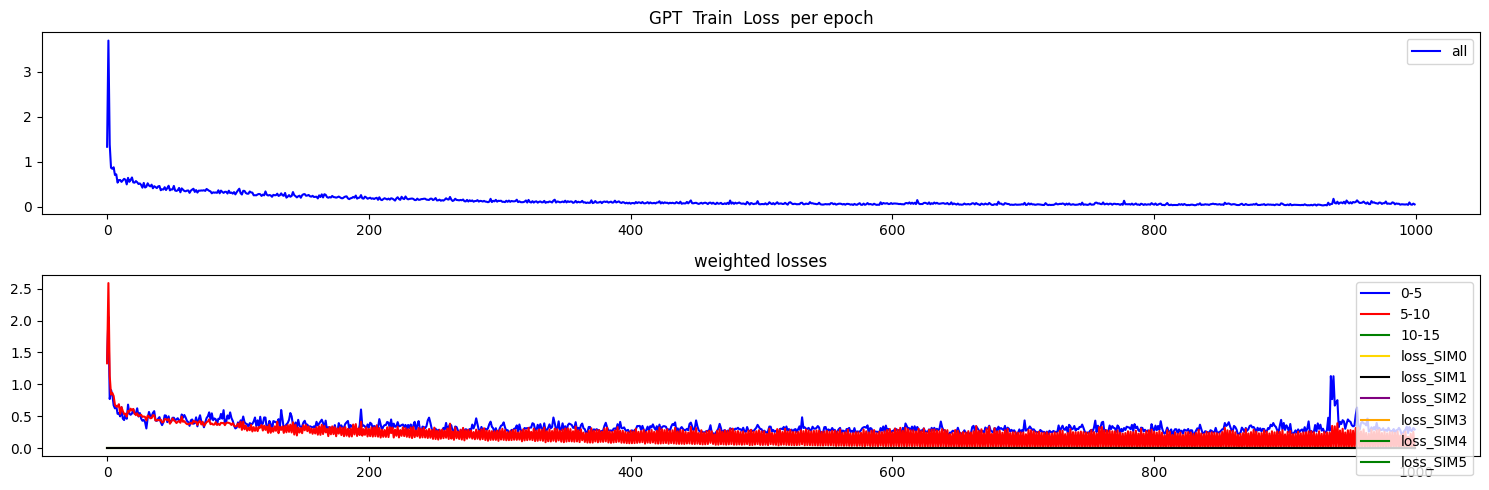

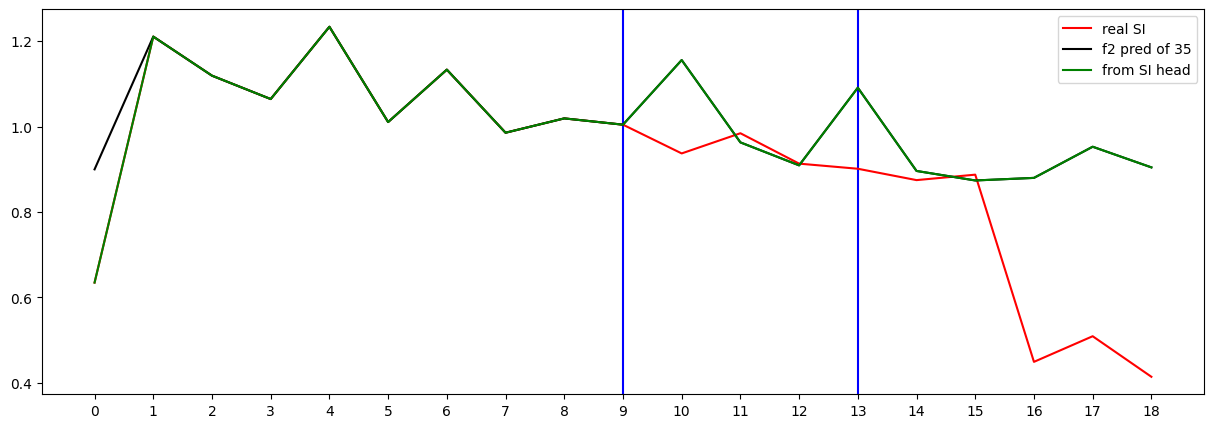

Testing R**2 - (all) - (no inputs):  0.9465225794391116
Testing R**2 - (f2) - SI full (no inputs):  -0.8531672604856859
Testing R**2 - SI head only (no inputs):  -0.8531672604856859
0 ...index R**2 (no inputs):  -0.9703949992488001
1 ...index R**2 (no inputs):  -4.221355513583651
2 ...index R**2 (no inputs):  -0.8531672604856859
3 ...index R**2 (no inputs):  -2.6670912726406004
4 ...index R**2 (no inputs):  -18.40693276267304
5 ...index R**2 (no inputs):  -1.9361543336781155
6 ...index R**2 (no inputs):  -2.814945089135431
7 ...index R**2 (no inputs):  -62.52440831390113
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.4047409363111163
10 ...index R**2 (no inputs):  0.41207483306832604
11 ...index R**2 (no inputs):  -128.36378886347694
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.10961872720155152
16 ...index R**2 (no inputs):  -0.2583043372920779
17 ...index R**2 (no inputs): 

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.468287
Loss_SI: 1.8028134107589722 Loss_all: 1.6224769353866577
===
[200] Train Loss: 0.218100
Loss_SI: 0.335403174161911 Loss_all: 0.28865501284599304
===
[400] Train Loss: 0.122664
Loss_SI: 0.22809115052223206 Loss_all: 0.27363818883895874
===
[600] Train Loss: 0.067989
Loss_SI: 0.25862830877304077 Loss_all: 0.2528199851512909
===
[800] Train Loss: 0.078564
Loss_SI: 0.2377011775970459 Loss_all: 0.2923283576965332
===


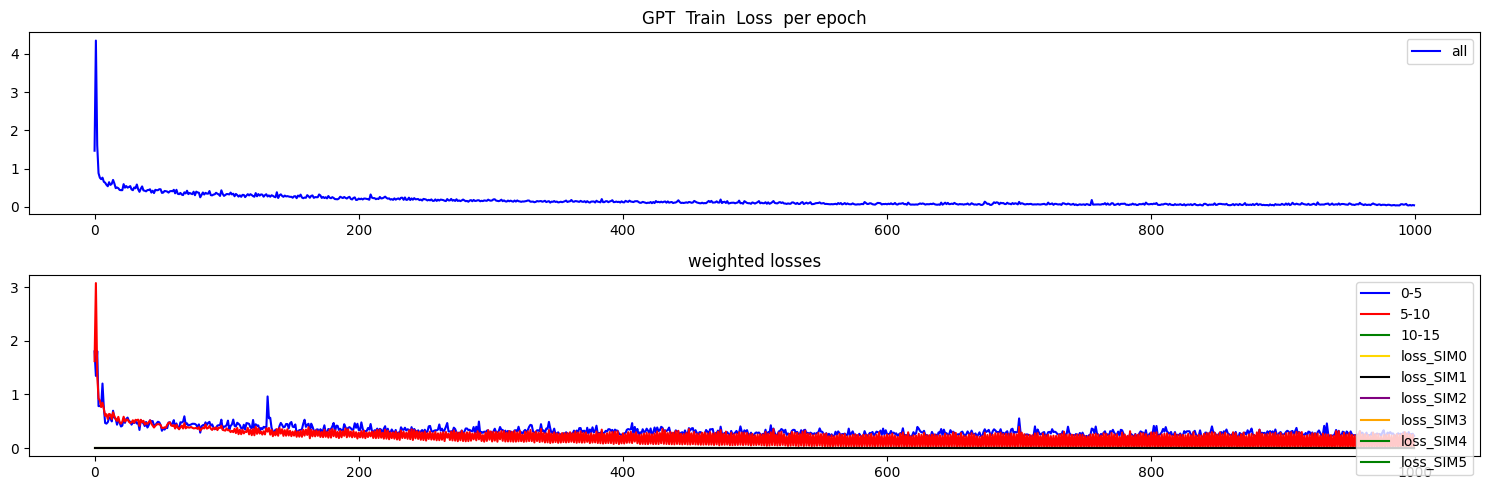

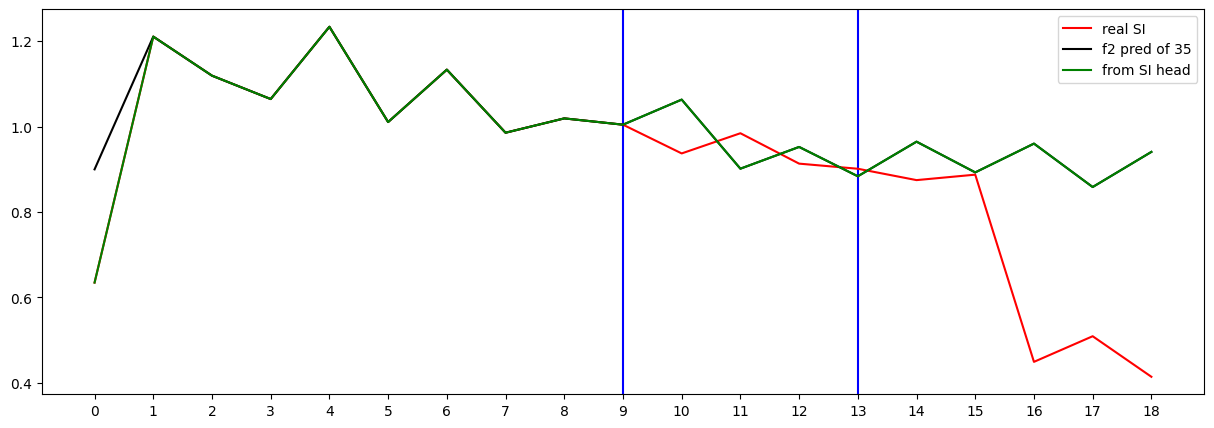

Testing R**2 - (all) - (no inputs):  0.9642091199695983
Testing R**2 - (f2) - SI full (no inputs):  -0.7231559621097141
Testing R**2 - SI head only (no inputs):  -0.7231559621097141
0 ...index R**2 (no inputs):  0.14489377697141226
1 ...index R**2 (no inputs):  -5.294294981120627
2 ...index R**2 (no inputs):  -0.7231559621097141
3 ...index R**2 (no inputs):  0.19964988472447875
4 ...index R**2 (no inputs):  -3.988551354486903
5 ...index R**2 (no inputs):  -0.9480210775345332
6 ...index R**2 (no inputs):  -3.5909796410698984
7 ...index R**2 (no inputs):  -27.51039309992232
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2362735294687479
10 ...index R**2 (no inputs):  -0.10338413137746505
11 ...index R**2 (no inputs):  -537.4785236489553
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.746798645477045
16 ...index R**2 (no inputs):  -0.09747702798105329
17 ...index R**2 (no inputs)

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.2975258005242829


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -1.1367266286513886


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.8267401525762039


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -1.0737533535959485



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: -0.05103890097495012
Naive_R2:....................................R²: 0.6643
RMSE:0.2003,MAE:0.1638,MASE:0.4775
1 .......................R² on just step n - R²: -0.05103890097495012
Naive_R2:....................................R²: 0.6643
RMSE:0.2003,MAE:0.1638,MASE:0.4775
2 .....................R² on first n steps - R²: 0.16676699055291733
Naive_R2:....................................R²: 0.5486
RMSE:0.1640,MAE:0.1302,MASE:0.6528
2 .......................R² on just step n - R²: 0.38357347934762953
Naive_R2:....................................R²: 0.7678
RMSE:0.1169,MAE:0.0967,MASE:0.3884
3 .....................R² on first n steps - R²: 0.0372856975196213
Naive_R2:....................................R²: 0.3678
RMSE:0.1740,MAE:0.1348,MASE:0.7512
3 .......................R² on just step n - R²: -0.2537736866609239
Naive_R2:....................................R²: 0.3720
RMSE:0.1926,MAE:0.1439,MASE:0.6038
4 .....................R² on first n st

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: -0.09126034714706655
Naive_R2:....................................R²: 0.6515
RMSE:0.2041,MAE:0.1629,MASE:0.4750
1 .......................R² on just step n - R²: -0.09126034714706655
Naive_R2:....................................R²: 0.6515
RMSE:0.2041,MAE:0.1629,MASE:0.4750
2 .....................R² on first n steps - R²: -0.3310530632099651
Naive_R2:....................................R²: 0.2790
RMSE:0.2073,MAE:0.1701,MASE:0.8526
2 .......................R² on just step n - R²: -0.9974121398407316
Naive_R2:....................................R²: 0.2476
RMSE:0.2104,MAE:0.1772,MASE:0.7122
3 .....................R² on first n steps - R²: -0.34717882889219975
Naive_R2:....................................R²: 0.1153
RMSE:0.2059,MAE:0.1581,MASE:0.8810
3 .......................R² on just step n - R²: -0.3941766622575307
Naive_R2:....................................R²: 0.3017
RMSE:0.2031,MAE:0.1341,MASE:0.5626
4 .....................R² on first n 

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: -0.1591620332495658
Naive_R2:....................................R²: 0.6298
RMSE:0.2104,MAE:0.1737,MASE:0.5066
1 .......................R² on just step n - R²: -0.1591620332495658
Naive_R2:....................................R²: 0.6298
RMSE:0.2104,MAE:0.1737,MASE:0.5066
2 .....................R² on first n steps - R²: -0.006433349607150918
Naive_R2:....................................R²: 0.4548
RMSE:0.1802,MAE:0.1494,MASE:0.7489
2 .......................R² on just step n - R²: 0.06529609577415385
Naive_R2:....................................R²: 0.6479
RMSE:0.1439,MAE:0.1250,MASE:0.5024
3 .....................R² on first n steps - R²: 0.026185240700057233
Naive_R2:....................................R²: 0.3605
RMSE:0.1750,MAE:0.1366,MASE:0.7614
3 .......................R² on just step n - R²: 0.08885515752003004
Naive_R2:....................................R²: 0.5436
RMSE:0.1642,MAE:0.1111,MASE:0.4662
4 .....................R² on first n 

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: -0.02027331955649947
Naive_R2:....................................R²: 0.6742
RMSE:0.1974,MAE:0.1427,MASE:0.4161
1 .......................R² on just step n - R²: -0.02027331955649947
Naive_R2:....................................R²: 0.6742
RMSE:0.1974,MAE:0.1427,MASE:0.4161
2 .....................R² on first n steps - R²: 0.1388110007259662
Naive_R2:....................................R²: 0.5335
RMSE:0.1667,MAE:0.1193,MASE:0.5979
2 .......................R² on just step n - R²: 0.24911848365107425
Naive_R2:....................................R²: 0.7171
RMSE:0.1290,MAE:0.0958,MASE:0.3851
3 .....................R² on first n steps - R²: 0.11813970638475957
Naive_R2:....................................R²: 0.4209
RMSE:0.1666,MAE:0.1190,MASE:0.6633
3 .......................R² on just step n - R²: 0.06529544899201134
Naive_R2:....................................R²: 0.5318
RMSE:0.1663,MAE:0.1185,MASE:0.4973
4 .....................R² on first n st


## Plot


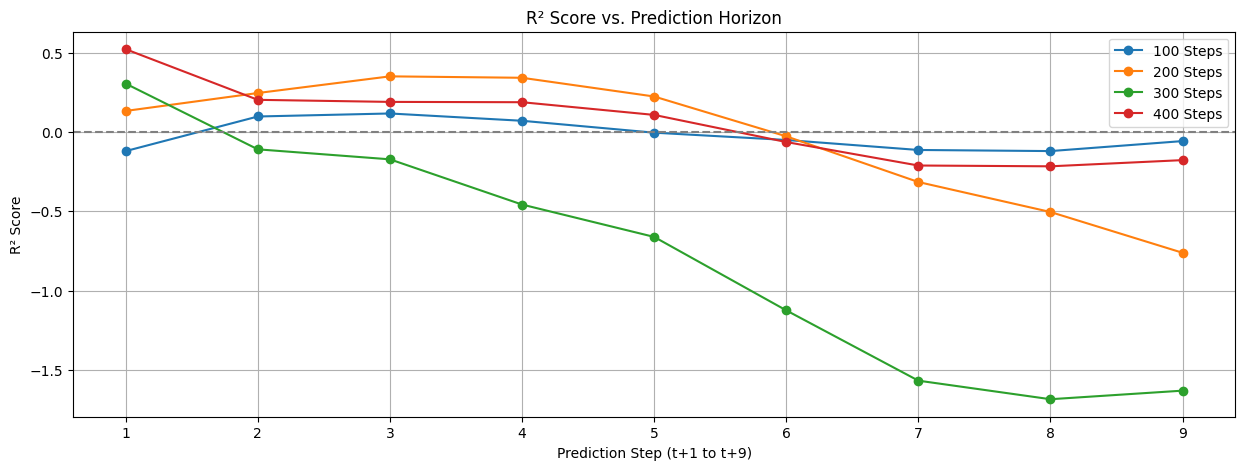

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
